## Lending Club Case study - Exploratory Data Analysis 

#### Problem Statement: 
   The finance company aims to minimize losses by identifying risky loan applicants. Approving a risky applicant may lead to defaults and financial loss, while rejecting a reliable applicant results in lost business. Using Exploratory Data Analysis (EDA), the goal is to analyze past loan data to identify key factors that predict loan defaults, enabling better decision-making to reduce credit risk and improve portfolio management.

Identify the risk factors to determine the loan defaulters by using eploratory data analysis techniques on the given dataset which includes complete loan data for all loans issued through the time period 2007 - 2011.

#### Exploratory Data analysis steps

1) Importing necessary libraries
2) Data loading
3) Data understanding
4) Data Cleaning
    - Fix rows
        - Delete Incorrect Rows (Unnecessary header, footer rows
        - Delete Summary Rows (Total, sub total rows)
        - Delete Extra rows (Column number indicator rows, blank rows, section indicator rows)
    - fix columns
        - Add Columns names if missing 
        - Rename columns consistently
        - Delete Unnecessary columns (unidentified, irrelevant columns)
        - Split columns for more data 
        - Merge columns for identifiers
        - Align misaligned columns
    - Fix missing values
        - Disguised Missing values
        - Significant number of Missing values in a row/column  --- Delete Rows or columns
        - Partial missing values: Fill missing values with correct values

    - Standardise values
        - fix Non-standard units
        - fix Values with varying Scales
        - handle Over-Precision
        - Remove outliers
    - Standardise Text
        - Remove extra characters
        - use common case 
        - use standard format
    - Fix invalid values     
    - Filter data
        - remove duplicate data
        - remove unnecessary rows
        - Pick columns which are only relevant to Data Analysis
        - Bring dispersed data together 
    
5) Segmentaion (Optional
6) Univariate Analysis (One variable at a time) (What is average age of all - Age column)
7) Bivariate Analysis (Two 
8) multivariate analyisis


### STEP 1: Importing necessary libraries

In [375]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### STEP 2: Data loading

In [376]:
loan_raw_data = pd.read_csv("loan.csv", sep=",")
loan_raw_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [377]:
loan_raw_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [378]:
sorted(loan_raw_data.columns)

['acc_now_delinq',
 'acc_open_past_24mths',
 'addr_state',
 'all_util',
 'annual_inc',
 'annual_inc_joint',
 'application_type',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'collection_recovery_fee',
 'collections_12_mths_ex_med',
 'delinq_2yrs',
 'delinq_amnt',
 'desc',
 'dti',
 'dti_joint',
 'earliest_cr_line',
 'emp_length',
 'emp_title',
 'funded_amnt',
 'funded_amnt_inv',
 'grade',
 'home_ownership',
 'id',
 'il_util',
 'initial_list_status',
 'inq_fi',
 'inq_last_12m',
 'inq_last_6mths',
 'installment',
 'int_rate',
 'issue_d',
 'last_credit_pull_d',
 'last_pymnt_amnt',
 'last_pymnt_d',
 'loan_amnt',
 'loan_status',
 'max_bal_bc',
 'member_id',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_last_delinq',
 'mths_since_last_major_derog',
 'mths_since_last_record',
 'mths_since_rcnt_il',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_

### STEP 3: Data Understanding

In [379]:
loan_raw_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [380]:
# write the details about raw data observations


### STEP 4: Data Cleaning

#### Step 4.1: Fix Rows
        - Loan Raw data not having, Summary Rows (Total, sub total rows), Extra rows (Column number indicator rows, blank rows, section indicator rows)

#### 4.2: fix columns
        - Add Columns names if missing --> All Columns names are proper
        - Rename columns consistently --> Column names are consistent
        - Delete Unnecessary columns (unidentified, irrelevant columns)
        - Split columns for more data 
        - Merge columns for identifiers
        - Align misaligned columns

In [381]:
# Check Null Values count in all columns
print(loan_raw_data.isnull().sum())

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64


In [382]:
# Get the percentage of missing values in each column
round(loan_raw_data.isnull().sum()/loan_raw_data.shape[0], 2)*100 


id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.0
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

-- Raw data contians columns with Null Values in 100% records, which will not provide any insights, so deleting the columns which contains more than 80% null values


In [383]:
# Identify columns with >80% null values

unnecessary_Columns = loan_raw_data.columns[(loan_raw_data.isnull().sum()/loan_raw_data.shape[0])*100 > 80]

In [384]:
# All the below mentioned columns are unnecessary for anlaysis 

print(unnecessary_Columns.size )
print(unnecessary_Columns)

56
Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m'

In [385]:
# Drop all the unnecessary columns which has more >80% null values

# loan_cleaned_data = loan_raw_data.dropna(thresh=loan_raw_data.shape[0] * 0.2, axis=1)

loan_cleaned_data = loan_raw_data.drop(unnecessary_Columns, axis=1)


In [386]:
loan_cleaned_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [387]:
loan_cleaned_data.shape

(39717, 55)

In [388]:
# After removing Null Value columns.. remaining columns
loan_cleaned_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [389]:
#Identify the columns which contain a single unique value across all records
loan_cleaned_data.loc[:, loan_cleaned_data.nunique() == 1]

,pymnt_plan,initial_list_status,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,tax_liens
0,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
1,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
2,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
3,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
4,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...
39712,n,f,NaN,1,INDIVIDUAL,0,NaN,0,NaN
39713,n,f,NaN,1,INDIVIDUAL,0,NaN,0,NaN
39714,n,f,NaN,1,INDIVIDUAL,0,NaN,0,NaN
39715,n,f,NaN,1,INDIVIDUAL,0,NaN,0,NaN


In [390]:
# Idnentified 9 columns which contains sinlge non-null value which will not be use full for any analysis - dropping this columns
loan_cleaned_data_1 = loan_cleaned_data.loc[:, loan_cleaned_data.nunique() > 1]

In [391]:
loan_cleaned_data_1.shape

(39717, 46)

In [392]:
#Looking at data dictionary and null values percentage in columns
loan_cleaned_data_1.isnull().sum()/loan_cleaned_data_1.shape[0] * 100

id                          0.000000
member_id                   0.000000
loan_amnt                   0.000000
funded_amnt                 0.000000
funded_amnt_inv             0.000000
term                        0.000000
int_rate                    0.000000
installment                 0.000000
grade                       0.000000
sub_grade                   0.000000
emp_title                   6.191303
emp_length                  2.706650
home_ownership              0.000000
annual_inc                  0.000000
verification_status         0.000000
issue_d                     0.000000
loan_status                 0.000000
url                         0.000000
desc                       32.585543
purpose                     0.000000
title                       0.027696
zip_code                    0.000000
addr_state                  0.000000
dti                         0.000000
delinq_2yrs                 0.000000
earliest_cr_line            0.000000
inq_last_6mths              0.000000
m

In [393]:
loan_cleaned_data_1.shape

(39717, 46)

In [394]:
sorted(loan_cleaned_data_1.columns)

['addr_state',
 'annual_inc',
 'collection_recovery_fee',
 'delinq_2yrs',
 'desc',
 'dti',
 'earliest_cr_line',
 'emp_length',
 'emp_title',
 'funded_amnt',
 'funded_amnt_inv',
 'grade',
 'home_ownership',
 'id',
 'inq_last_6mths',
 'installment',
 'int_rate',
 'issue_d',
 'last_credit_pull_d',
 'last_pymnt_amnt',
 'last_pymnt_d',
 'loan_amnt',
 'loan_status',
 'member_id',
 'mths_since_last_delinq',
 'open_acc',
 'out_prncp',
 'out_prncp_inv',
 'pub_rec',
 'pub_rec_bankruptcies',
 'purpose',
 'recoveries',
 'revol_bal',
 'revol_util',
 'sub_grade',
 'term',
 'title',
 'total_acc',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_int',
 'total_rec_late_fee',
 'total_rec_prncp',
 'url',
 'verification_status',
 'zip_code']

In [395]:
loan_cleaned_data_1.shape

(39717, 46)

In [396]:
# Understand each column and drop if not contributing analysis

loan_cleaned_data_1['id'].nunique

<bound method IndexOpsMixin.nunique of 0        1077501
1        1077430
2        1077175
3        1076863
4        1075358
          ...   
39712      92187
39713      90665
39714      90395
39715      90376
39716      87023
Name: id, Length: 39717, dtype: int64>

In [397]:
loan_cleaned_data_1['member_id'].nunique

<bound method IndexOpsMixin.nunique of 0        1296599
1        1314167
2        1313524
3        1277178
4        1311748
          ...   
39712      92174
39713      90607
39714      90390
39715      89243
39716      86999
Name: member_id, Length: 39717, dtype: int64>

In [398]:
# Dropping columns  desc and mths_since_last_delinq due to below reasons
# 1) desc - Data provided by browser (it has various details like loan Amount requested etc..) 
#           but all are in unstructured format and with 33% null values so not useful for analysis
# 2) mths_since_last_delinq: This column has around 65% null values 
loan_cleaned_data_1 = loan_cleaned_data_1.drop(['desc','mths_since_last_delinq'], axis=1)
# ID and Member_ID columns are index columns, which are not useful in analyis, hence dropping these columns
loan_cleaned_data_1 = loan_cleaned_data_1.drop(['id','member_id'], axis=1)

In [399]:
loan_cleaned_data_1.shape

(39717, 42)

In [400]:
loan_cleaned_data_1['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    37339
1.0     1674
2.0        7
Name: count, dtype: int64

In [401]:
loan_cleaned_data_1['last_credit_pull_d'].value_counts()

last_credit_pull_d
May-16    10308
Apr-16     2547
Mar-16     1123
Feb-13      843
Feb-16      736
          ...  
May-08        1
Jun-08        1
Jul-08        1
May-07        1
Jul-07        1
Name: count, Length: 106, dtype: int64

In [402]:
loan_cleaned_data_1['last_pymnt_amnt'].value_counts()

last_pymnt_amnt
0.00       74
276.06     21
200.00     17
50.00      16
100.00     15
           ..
1763.87     1
172.27      1
889.67      1
150.73      1
256.59      1
Name: count, Length: 34930, dtype: int64

In [403]:
loan_cleaned_data_1['loan_amnt'].value_counts()


loan_amnt
10000    2833
12000    2334
5000     2051
6000     1908
15000    1895
         ... 
22875       1
8175        1
19475       1
21225       1
22550       1
Name: count, Length: 885, dtype: int64

In [404]:
loan_cleaned_data_1['funded_amnt'].value_counts()


funded_amnt
10000    2741
12000    2244
5000     2040
6000     1898
15000    1784
         ... 
26250       1
24725       1
31750       1
22625       1
22350       1
Name: count, Length: 1041, dtype: int64

In [405]:
loan_cleaned_data_1['funded_amnt_inv'].value_counts()


funded_amnt_inv
5000.000000     1309
10000.000000    1275
6000.000000     1200
12000.000000    1069
8000.000000      900
                ... 
4944.213109        1
18400.281660       1
14659.820000       1
6294.151315        1
11808.924370       1
Name: count, Length: 8205, dtype: int64

In [406]:
loan_cleaned_data_1['term'].value_counts()


term
 36 months    29096
 60 months    10621
Name: count, dtype: int64

In [407]:
loan_cleaned_data_1['int_rate'].value_counts()

int_rate
10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
         ... 
18.36%      1
16.96%      1
16.15%      1
16.01%      1
17.44%      1
Name: count, Length: 371, dtype: int64

In [408]:
loan_cleaned_data_1['loan_amnt'].value_counts()

loan_amnt
10000    2833
12000    2334
5000     2051
6000     1908
15000    1895
         ... 
22875       1
8175        1
19475       1
21225       1
22550       1
Name: count, Length: 885, dtype: int64

In [409]:
loan_cleaned_data_1['installment'].value_counts()


installment
311.11     68
180.96     59
311.02     54
150.80     48
368.45     46
           ..
1224.46     1
63.44       1
157.67      1
492.34      1
255.43      1
Name: count, Length: 15383, dtype: int64

In [410]:

loan_cleaned_data_1['emp_title'].value_counts()



emp_title
US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Community College of Philadelphia      1
AMEC                                   1
lee county sheriff                     1
Bacon County Board of Education        1
Evergreen Center                       1
Name: count, Length: 28820, dtype: int64

In [411]:
# Employee title column contain 28820 unique random values which will not infer any insights for prediction

In [412]:
loan_cleaned_data_1['emp_length'].value_counts()


emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [413]:
loan_cleaned_data_1['home_ownership'].value_counts()


home_ownership
RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: count, dtype: int64

In [414]:
loan_cleaned_data_1['annual_inc'].value_counts()


annual_inc
60000.0    1505
50000.0    1057
40000.0     876
45000.0     830
30000.0     825
           ... 
56820.0       1
45314.0       1
53913.0       1
62880.0       1
27376.0       1
Name: count, Length: 5318, dtype: int64

In [415]:
loan_cleaned_data_1['verification_status'].value_counts()


verification_status
Not Verified       16921
Verified           12809
Source Verified     9987
Name: count, dtype: int64

In [416]:
# url column has same with ID index values which will not provide any insights hence drop the column

In [417]:
# title can be dropped as similiar to Emp_title which is not helpful in analysis

In [418]:
# zip_code can be dropped as it is an extra column 

In [419]:
loan_cleaned_data_1['addr_state'].value_counts()


addr_state
CA    7099
NY    3812
FL    2866
TX    2727
NJ    1850
IL    1525
PA    1517
VA    1407
GA    1398
MA    1340
OH    1223
MD    1049
AZ     879
WA     840
CO     792
NC     788
CT     751
MI     720
MO     686
MN     615
NV     497
SC     472
WI     460
AL     452
OR     451
LA     436
KY     325
OK     299
KS     271
UT     258
AR     245
DC     214
RI     198
NM     189
WV     177
HI     174
NH     171
DE     114
MT      85
WY      83
AK      80
SD      64
VT      54
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: count, dtype: int64

In [420]:
#add_state is rereuiqred to perform state wise analysis

In [421]:
loan_cleaned_data_1['pub_rec_bankruptcies'].value_counts()


pub_rec_bankruptcies
0.0    37339
1.0     1674
2.0        7
Name: count, dtype: int64

In [422]:
loan_cleaned_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   funded_amnt              39717 non-null  int64  
 2   funded_amnt_inv          39717 non-null  float64
 3   term                     39717 non-null  object 
 4   int_rate                 39717 non-null  object 
 5   installment              39717 non-null  float64
 6   grade                    39717 non-null  object 
 7   sub_grade                39717 non-null  object 
 8   emp_title                37258 non-null  object 
 9   emp_length               38642 non-null  object 
 10  home_ownership           39717 non-null  object 
 11  annual_inc               39717 non-null  float64
 12  verification_status      39717 non-null  object 
 13  issue_d                  39717 non-null  object 
 14  loan_status           

In [423]:
# Dropping below columns as data is not suitable for analysis
DrppingColumns = ['emp_title', 'url', 'title','out_prncp','out_prncp_inv','collection_recovery_fee','pub_rec',
                  'zip_code','total_acc','total_rec_late_fee','recoveries','revol_bal','revol_util', 'installment',
                  'last_credit_pull_d','last_pymnt_amnt','last_pymnt_d','total_pymnt','total_pymnt_inv','total_rec_int',
                  'total_rec_prncp']

In [424]:
loan_cleaned_data_1 = loan_cleaned_data_1.drop(DrppingColumns, axis=1)

In [425]:
loan_cleaned_data_1.shape

(39717, 21)

In [426]:
sorted(loan_cleaned_data_1.columns)

['addr_state',
 'annual_inc',
 'delinq_2yrs',
 'dti',
 'earliest_cr_line',
 'emp_length',
 'funded_amnt',
 'funded_amnt_inv',
 'grade',
 'home_ownership',
 'inq_last_6mths',
 'int_rate',
 'issue_d',
 'loan_amnt',
 'loan_status',
 'open_acc',
 'pub_rec_bankruptcies',
 'purpose',
 'sub_grade',
 'term',
 'verification_status']

In [427]:
loan_cleaned_data_1.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [428]:
loan_cleaned_data_1.shape

(39717, 21)

In [429]:
loan_cleaned_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   grade                 39717 non-null  object 
 6   sub_grade             39717 non-null  object 
 7   emp_length            38642 non-null  object 
 8   home_ownership        39717 non-null  object 
 9   annual_inc            39717 non-null  float64
 10  verification_status   39717 non-null  object 
 11  issue_d               39717 non-null  object 
 12  loan_status           39717 non-null  object 
 13  purpose               39717 non-null  object 
 14  addr_state            39717 non-null  object 
 15  dti                

In [430]:
# Check for Duplicate Rows and dlelete if exists
loan_cleaned_data_1[ loan_cleaned_data_1.duplicated()].shape

(0, 21)

In [431]:
#Find rows with upto more than 5 columns empty values and drop them

loan_cleaned_data_1[loan_cleaned_data_1.isnull().sum(axis=1) > 5]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec_bankruptcies


In [432]:
# Drop the Rows with loan_status as 'Current'  as
# Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. 
# These candidates are not labelled as 'defaulted'.

loan_cleaned_data_1[ loan_cleaned_data_1.loan_status == 'Current']

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec_bankruptcies
4,3000,3000,3000.00000,60 months,12.69%,B,B5,1 year,RENT,80000.0,...,Dec-11,Current,other,OR,17.94,0,Jan-96,0,15,0.0
32,10000,10000,9975.00000,60 months,15.96%,C,C5,2 years,RENT,29120.0,...,Dec-11,Current,debt_consolidation,FL,22.83,0,Feb-97,1,11,0.0
39,12500,12500,12475.00000,60 months,12.69%,B,B5,1 year,RENT,27000.0,...,Dec-11,Current,debt_consolidation,IL,16.04,0,Dec-01,3,6,0.0
86,14000,14000,13975.00000,60 months,17.27%,D,D3,4 years,RENT,28000.0,...,Dec-11,Current,other,WA,6.34,0,Jul-05,2,5,0.0
95,15300,15300,15275.00000,60 months,22.06%,F,F4,6 years,RENT,85000.0,...,Dec-11,Current,credit_card,VA,20.58,0,Feb-84,2,14,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15972,10400,10400,10400.00000,60 months,6.00%,E,E3,5 years,MORTGAGE,29000.0,...,May-11,Current,credit_card,TX,10.84,0,Nov-02,0,7,0.0
15981,6000,6000,6000.00000,60 months,10.37%,B,B3,1 year,RENT,24000.0,...,Apr-11,Current,car,NY,11.05,0,Oct-05,0,6,0.0
16361,19200,19200,18847.76292,60 months,10.74%,B,B4,5 years,MORTGAGE,100000.0,...,Apr-11,Current,small_business,NJ,4.43,0,Jan-91,0,6,0.0
16609,9350,9350,9350.00000,60 months,10.00%,B,B2,8 years,RENT,66000.0,...,Apr-11,Current,car,NY,4.84,0,Dec-01,0,4,0.0


In [433]:
#dopping 1140 rcords which are having loan satus as 'Current' as those candiates are not lebelled as 'Dafaulter'

loan_cleaned_data_1 =loan_cleaned_data_1[~(loan_cleaned_data_1.loan_status == 'Current')]

In [434]:
loan_cleaned_data_1.shape

(38577, 21)

In [435]:
loan_cleaned_data_1 = loan_cleaned_data_1[loan_cleaned_data_1['emp_length'].notna()]

In [436]:
loan_cleaned_data_1 = loan_cleaned_data_1[loan_cleaned_data_1['pub_rec_bankruptcies'].notna()]

In [437]:
loan_cleaned_data_1.shape

(36847, 21)

In [438]:
#Standardize column data types

#interest rate - is object -- should be converted to float by removing the %
loan_cleaned_data_1['int_rate'] = pd.to_numeric(loan_cleaned_data_1['int_rate'].replace('%', '', regex=True))
    

In [439]:
loan_cleaned_data_1['loan_amnt'] = loan_cleaned_data_1['loan_amnt'].astype(float)
loan_cleaned_data_1['funded_amnt'] = loan_cleaned_data_1['funded_amnt'].astype(float)



In [440]:
#Convert issue_d in to proper date format
loan_cleaned_data_1['issue_d'] = pd.to_datetime(loan_cleaned_data_1['issue_d'],format='%b-%y') 
loan_cleaned_data_1['issue_d']

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39562   2007-11-01
39573   2007-11-01
39623   2007-10-01
39666   2007-08-01
39680   2007-08-01
Name: issue_d, Length: 36847, dtype: datetime64[ns]

In [441]:
#update Emp_Length column by 

loan_cleaned_data_1['emp_length'].replace('years', '', regex = True)

0            10+ 
1        < 1 year
2            10+ 
3            10+ 
5              3 
           ...   
39562      1 year
39573          3 
39623          8 
39666          2 
39680          2 
Name: emp_length, Length: 36847, dtype: object

In [442]:
# Standardize the Emp length values by replacing the < + years with empty and keep only numbers

loan_cleaned_data_1['emp_length'] = loan_cleaned_data_1['emp_length'].str.replace(r'[<+ years]', '', regex=True).str.strip()


In [443]:
loan_cleaned_data_1['emp_length'].unique()

array(['10', '1', '3', '8', '9', '4', '5', '6', '2', '7'], dtype=object)

In [444]:
loan_cleaned_data_1.isnull().mean()*100

loan_amnt               0.0
funded_amnt             0.0
funded_amnt_inv         0.0
term                    0.0
int_rate                0.0
grade                   0.0
sub_grade               0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
addr_state              0.0
dti                     0.0
delinq_2yrs             0.0
earliest_cr_line        0.0
inq_last_6mths          0.0
open_acc                0.0
pub_rec_bankruptcies    0.0
dtype: float64

In [445]:
loan_cleaned_data_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36847 entries, 0 to 39680
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             36847 non-null  float64       
 1   funded_amnt           36847 non-null  float64       
 2   funded_amnt_inv       36847 non-null  float64       
 3   term                  36847 non-null  object        
 4   int_rate              36847 non-null  float64       
 5   grade                 36847 non-null  object        
 6   sub_grade             36847 non-null  object        
 7   emp_length            36847 non-null  object        
 8   home_ownership        36847 non-null  object        
 9   annual_inc            36847 non-null  float64       
 10  verification_status   36847 non-null  object        
 11  issue_d               36847 non-null  datetime64[ns]
 12  loan_status           36847 non-null  object        
 13  purpose              

In [446]:
loan_cleaned_data_1['loan_amnt'].value_counts()

loan_amnt
10000.0    2671
12000.0    2179
5000.0     1915
6000.0     1806
15000.0    1769
           ... 
27200.0       1
1625.0        1
24650.0       1
19150.0       1
700.0         1
Name: count, Length: 856, dtype: int64

In [447]:
# Need to do distribute in slabs
#loan_amt
#funded_amnt
# int_rate
#annual_inc
    

In [448]:
loan_cleaned_data_1['earliest_cr_line'].value_counts()

earliest_cr_line
Oct-99    352
Nov-98    348
Oct-00    327
Dec-98    326
Nov-99    306
         ... 
May-65      1
Feb-73      1
Dec-65      1
Jan-46      1
May-72      1
Name: count, Length: 513, dtype: int64

In [449]:
loan_cleaned_data_1['inq_last_6mths'].value_counts() 

inq_last_6mths
0    17877
1    10191
2     5405
3     2843
4      294
5      136
6       57
7       32
8       12
Name: count, dtype: int64

In [450]:
loan_cleaned_data_1['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    35312
1.0     1530
2.0        5
Name: count, dtype: int64

In [451]:
loan_cleaned_data_1['int_rate'] = loan_cleaned_data_1['int_rate'].round(1)

In [452]:
loan_cleaned_data_1['int_rate'].unique()

array([10.6, 15.3, 16. , 13.5,  7.9, 18.6, 21.3, 12.7, 14.6,  9.9, 16.3,
        6. , 11.7, 12.4, 14.3, 16.8,  7.5,  8.9, 18.2,  6.6, 19.9, 17.3,
       17.6, 21.7, 19.4, 20.9, 20.3, 23.9, 19. , 23.1, 22.7, 22.4, 22.1,
       24.1, 23.5, 12. , 11. , 10. , 18.8, 11.5, 16.5,  7. , 13. , 15.2,
       14.8,  5.4,  8.5, 17.5, 15.6, 19.3, 14. , 18.4, 16.9, 18. , 21. ,
       22.8, 19.7, 20.6, 20.2, 21.4, 23.2, 22.5, 23.6, 12.6, 18.1, 11.6,
        7.4, 11.1, 12.1, 16.1, 22.6, 16.6, 17.2, 12.9, 20.7,  9.7, 21.8,
       19.8, 18.5, 13.8, 22.9, 24.4, 21.5,  7.3, 17.9, 20.1, 13.4, 14.9,
       13.1, 17.1, 10.4, 14.2, 16.4,  7.7, 10.7,  5.8,  6.9,  9.6, 14.5,
       21.6, 20.8, 21.2, 20.5, 12.2,  6.2,  6.5,  9.2, 16.7, 13.7, 14.1,
       20. , 17.8, 17.4, 20.4, 18.9, 21.1, 13.2, 13.6,  6.8,  6.4, 11.9,
        7.1, 14.4, 10.8, 14.7, 18.3, 18.7, 10.2, 15.7, 11.4, 15. ,  8.6,
       17. , 11.8, 13.9, 19.1, 12.5, 17.7, 19.5,  8. ,  9.3, 12.8, 11.3,
       15.4, 19.2,  9.4, 10.5,  9.1, 15.9, 16.2,  8

In [453]:
#Segmentation
numerical_cols = ['annual_inc', 'delinq_2yrs', 'dti', 'funded_amnt', 'funded_amnt_inv', 'inq_last_6mths', 
 'int_rate', 'loan_amnt', 'open_acc', 'pub_rec_bankruptcies','earliest_cr_line']

ordered_categorical_cols = ['emp_length', 'grade', 'sub_grade'] 

unordered_categorical_cols = ['addr_state', 'home_ownership', 'loan_status', 'purpose', 'term', 'verification_status'] 


In [454]:
loan_cleaned_data_1.shape

(36847, 21)

In [455]:
loan_cleaned_data_1.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,issue_d,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec_bankruptcies
count,36847.000000,36847.000000,36847.000000,36847.000000,3.684700e+04,36847,36847.000000,36847.000000,36847.000000,36847.000000,36847.000000
mean,11141.327652,10872.924526,10430.400856,11.988509,6.940448e+04,2010-11-10 16:10:29.196406784,13.330449,0.146172,0.869759,9.296578,0.041794
min,500.000000,500.000000,0.000000,5.400000,4.000000e+03,2007-08-01 00:00:00,0.000000,0.000000,0.000000,2.000000,0.000000
25%,5500.000000,5400.000000,5000.000000,8.900000,4.100400e+04,2010-05-01 00:00:00,8.210000,0.000000,0.000000,6.000000,0.000000
50%,10000.000000,9600.000000,9000.000000,11.900000,6.000000e+04,2011-02-01 00:00:00,13.420000,0.000000,1.000000,9.000000,0.000000
75%,15000.000000,15000.000000,14335.044685,14.500000,8.300000e+04,2011-08-01 00:00:00,18.590000,0.000000,1.000000,12.000000,0.000000
max,35000.000000,35000.000000,35000.000000,24.400000,6.000000e+06,2011-12-01 00:00:00,29.990000,11.000000,8.000000,44.000000,2.000000
std,7369.988994,7109.330771,7008.919431,3.703468,6.402747e+04,NaN,6.651565,0.492100,1.067854,4.377256,0.200799


### Identify Outliers 


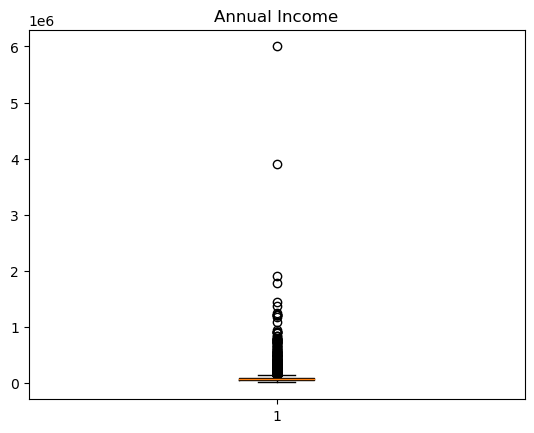

In [456]:
plt.boxplot(loan_cleaned_data_1['annual_inc'])
plt.title('Annual Income')
plt.show()

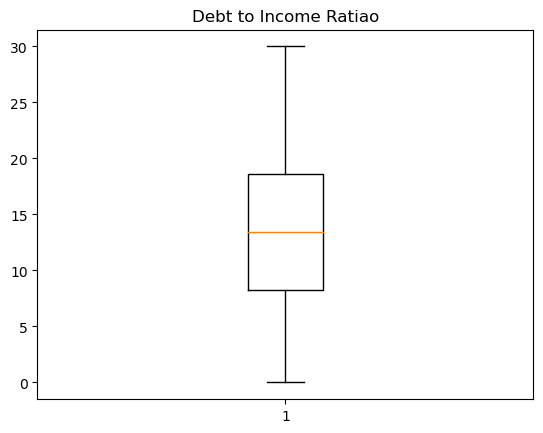

In [457]:
plt.boxplot(loan_cleaned_data_1['dti'])
plt.title('Debt to Income Ratiao')
plt.show()

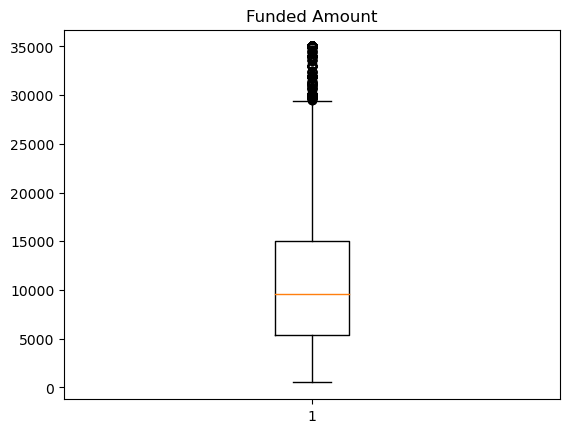

In [458]:
plt.boxplot(loan_cleaned_data_1['funded_amnt'])
plt.title('Funded Amount')
plt.show()

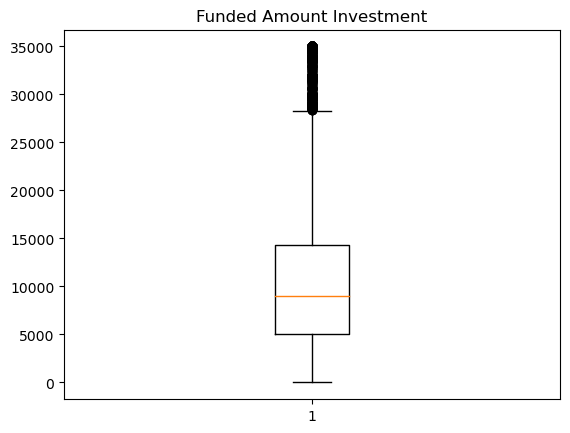

In [459]:
plt.boxplot(loan_cleaned_data_1['funded_amnt_inv'])
plt.title('Funded Amount Investment')
plt.show()

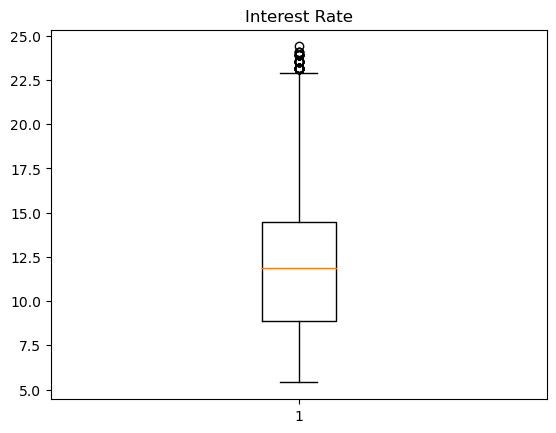

In [460]:
plt.boxplot(loan_cleaned_data_1['int_rate'])
plt.title('Interest Rate')
plt.show()

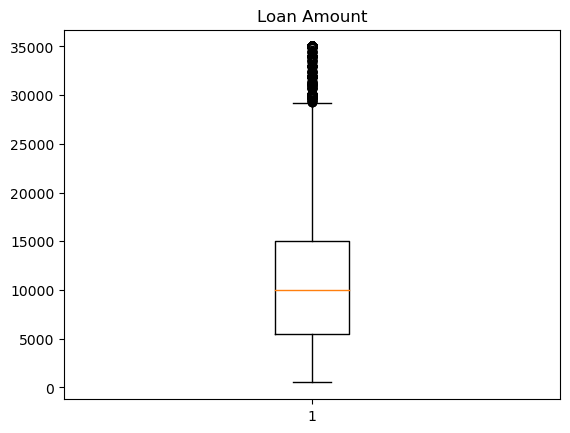

In [461]:
plt.boxplot(loan_cleaned_data_1['loan_amnt'])
plt.title('Loan Amount')
plt.show()

In [462]:
# looking at above plots, outliers need to remove for below columns
# annual_inc funded_amnt funded_amnt_inv int_rate loan_amnt

# REmove outliers using IQR 

def df_remove_outliers_iqr(df, col_name):
    """
    Removes outliers from a DataFrame column using the IQR method.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    col_name (str): The column name to check for outliers.

    Returns:
    pd.DataFrame: A DataFrame with the outliers removed.
    """
    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove outliers
    df_no_outliers = df[(df[col_name] >= lower_bound) & (df[col_name] <= upper_bound)]
    
    return df_no_outliers


 
loan_cleaned_data_1 = df_remove_outliers_iqr(loan_cleaned_data_1, 'annual_inc')
loan_cleaned_data_1 = df_remove_outliers_iqr(loan_cleaned_data_1, 'funded_amnt')
loan_cleaned_data_1 = df_remove_outliers_iqr(loan_cleaned_data_1, 'funded_amnt_inv')
loan_cleaned_data_1 = df_remove_outliers_iqr(loan_cleaned_data_1, 'int_rate')
loan_cleaned_data_1 = df_remove_outliers_iqr(loan_cleaned_data_1, 'loan_amnt')






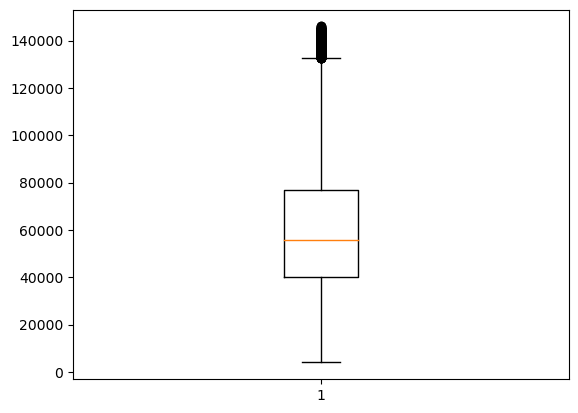

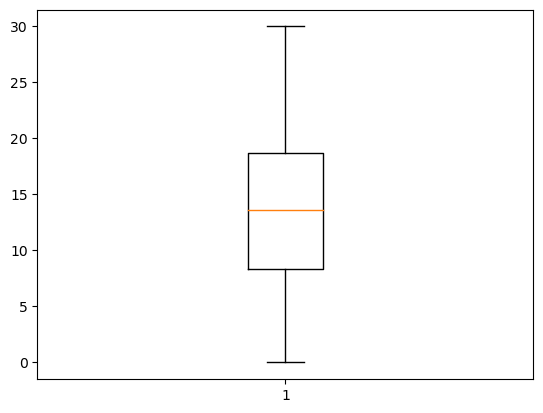

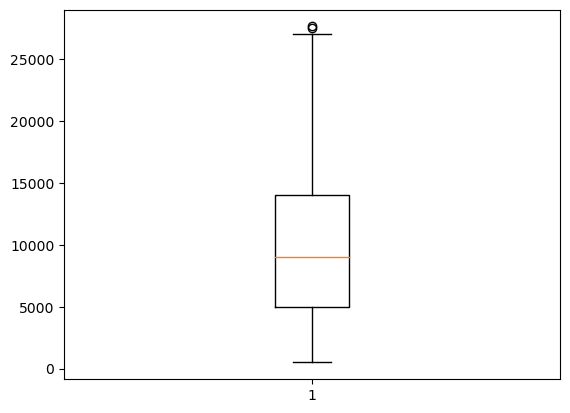

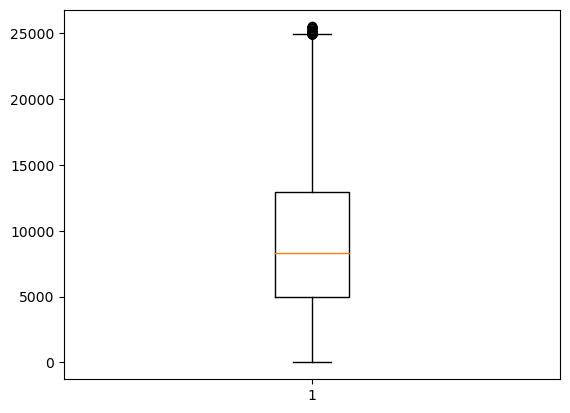

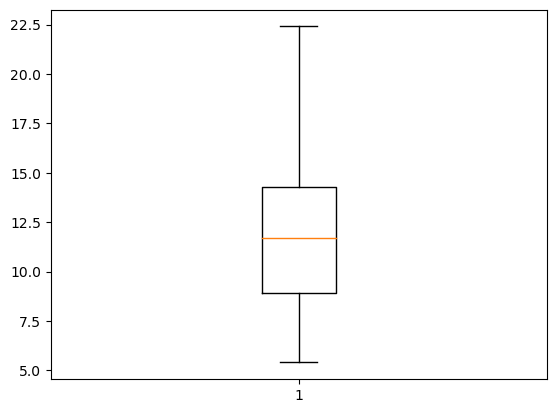

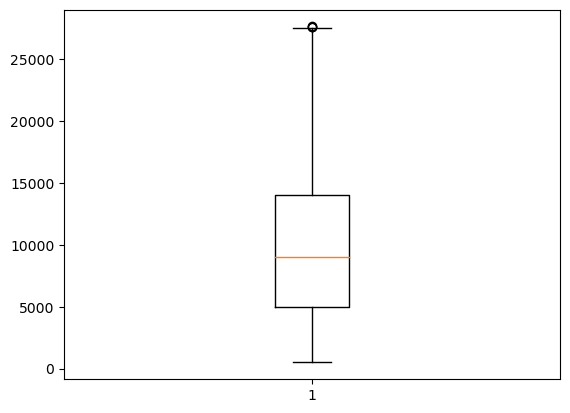

In [463]:
# Box plots after removing outliers 

plt.boxplot(loan_cleaned_data_1['annual_inc'])
plt.show()

plt.boxplot(loan_cleaned_data_1['dti'])
plt.show()

plt.boxplot(loan_cleaned_data_1['funded_amnt'])
plt.show()

plt.boxplot(loan_cleaned_data_1['funded_amnt_inv'])
plt.show()

plt.boxplot(loan_cleaned_data_1['int_rate'])
plt.show()

plt.boxplot(loan_cleaned_data_1['loan_amnt'])
plt.show()


## Univariate Analysis

In [465]:
#Univariate Analysis - Numerical Continous variables

#For univariate analysis of numerical continuous variables, several types of graphs 
# and plots are commonly used to visualize the distribution, spread, and central tendency of the data. 
# We will be using below plots:
# 1) Histogram
#    Purpose: Visualizes the frequency distribution of a continuous variable by dividing the data into bins (intervals).
#    Key Insight: Helps to understand the shape of the distribution (normal, skewed, etc.), and detect the presence of outliers.


#plt.hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, 
#         bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, 
#         log=False, color=None, label=None, stacked=False, edgecolor=None, linewidth=None,
#         linestyle=None, alpha=None)

# 2) Box Plot (Box-and-Whisker Plot)
#    Purpose: Shows the spread of the data by displaying the median, quartiles, and potential outliers.
#    Key Insight: Useful for detecting skewness and outliers in the data.



In [466]:
# Univarients function to plot both Hist and Box plot for univariate numerical continous variables
def df_plot_HistBoxGraphs(df, column):
    """
    Plots a histogram and a box plot for a specified column in a DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    column (str): The name of the column to plot.
    """

    # Create subplots: 1 row, 2 columns
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Create a histogram on the first subplot
    axs[0].hist(df[column],bins=25,  color='blue', alpha=0.7)
    axs[0].set_title(f'Histogram of {column}')
    axs[0].set_xlabel(column)
    axs[0].set_ylabel('Frequency')

    # Create a box plot on the second subplot
    axs[1].boxplot(df[column], vert=True, patch_artist=True)
    axs[1].set_title(f'Box Plot of {column}')
    axs[1].set_ylabel(column)

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()

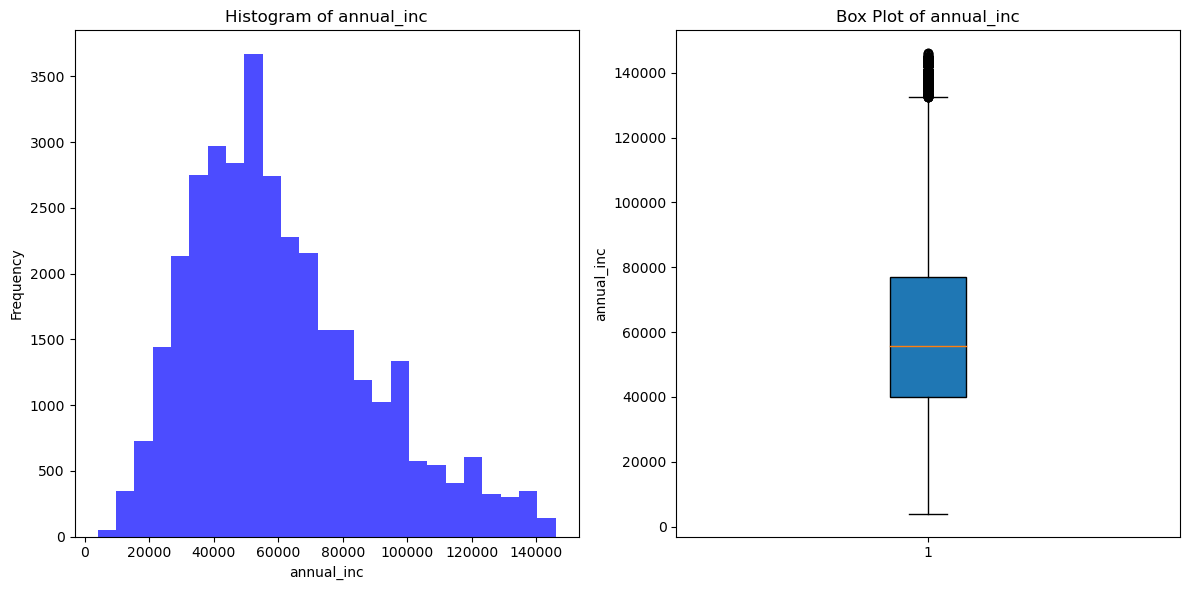

count     34034.000000
mean      60880.073629
std       27725.324333
min        4000.000000
25%       40000.000000
50%       55702.000000
75%       76998.000000
max      145992.000000
Name: annual_inc, dtype: float64

In [467]:
df_plot_HistBoxGraphs(loan_cleaned_data_1, 'annual_inc')
# describe the Loan Amount
loan_cleaned_data_1['annual_inc'].describe()

In [468]:
# Annual Income Variable observations:
#'Annual Income of Most applicants is in between 40000-77000 as per IQR.
# Average Annual Income

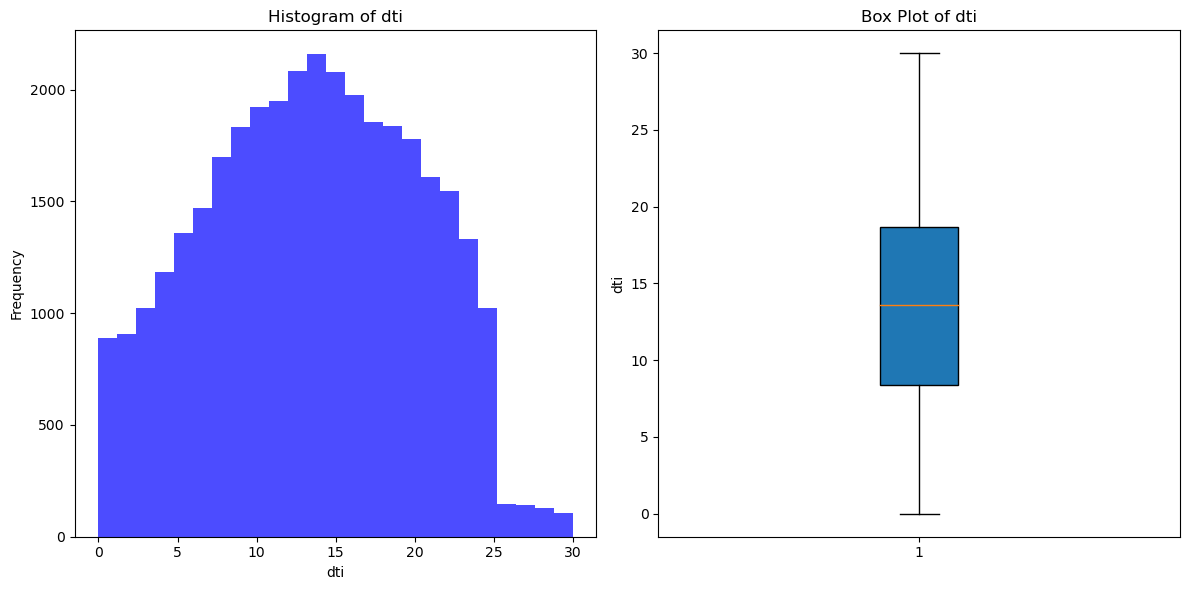

count    34034.000000
mean        13.460979
std          6.641264
min          0.000000
25%          8.380000
50%         13.570000
75%         18.710000
max         29.990000
Name: dti, dtype: float64

In [469]:
df_plot_HistBoxGraphs(loan_cleaned_data_1, 'dti')
# describe the Loan Amount
loan_cleaned_data_1['dti'].describe()

In [470]:
# DTI Variable observations:
#'DTI of Most applicants is in between 8 to 18 as per IQR.
# Average DTI 13

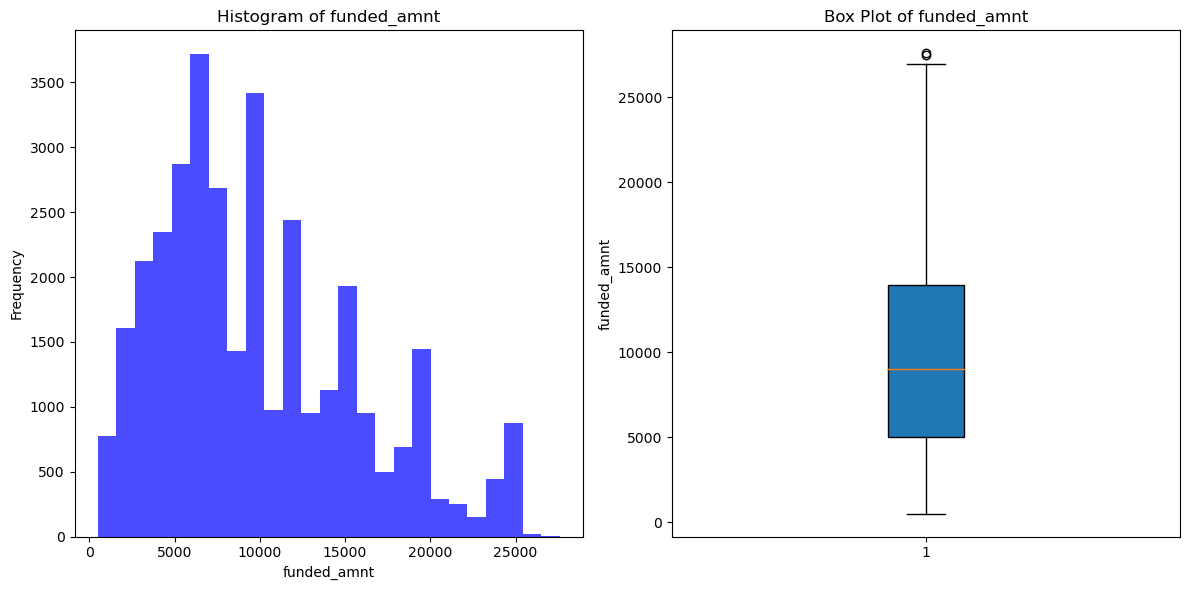

count    34034.000000
mean      9911.575924
std       5904.857737
min        500.000000
25%       5000.000000
50%       9000.000000
75%      13975.000000
max      27600.000000
Name: funded_amnt, dtype: float64

In [471]:
df_plot_HistBoxGraphs(loan_cleaned_data_1, 'funded_amnt')
# describe the Loan Amount
loan_cleaned_data_1['funded_amnt'].describe()

In [472]:
# funded Amount Variable observations:
#'funded amount of Most applicants is in between 5000 to 14000 as per IQR.
# Average funded 9900

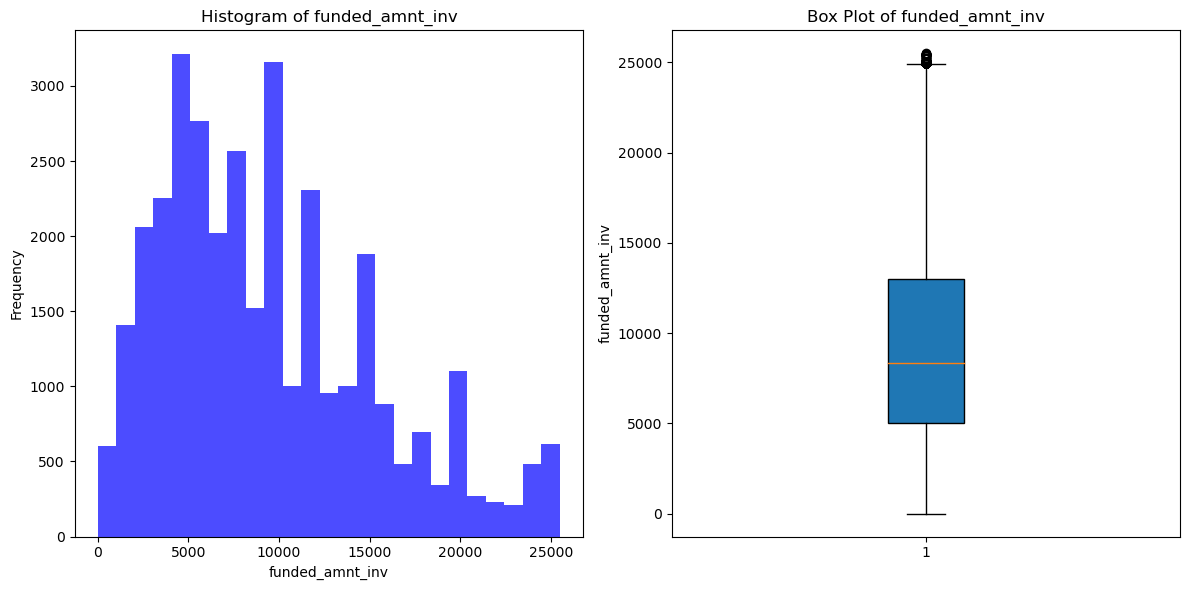

count    34034.000000
mean      9502.480587
std       5821.561156
min          0.000000
25%       5000.000000
50%       8325.000000
75%      12975.000000
max      25500.000000
Name: funded_amnt_inv, dtype: float64

In [473]:
df_plot_HistBoxGraphs(loan_cleaned_data_1, 'funded_amnt_inv')
# describe the Loan Amount
loan_cleaned_data_1['funded_amnt_inv'].describe()

In [474]:
# funded Amount Inv Variable observations:
#'funded amount Inv of Most applicants is in between 5000 to 12975 as per IQR.
# Average funded amount Inv 9500

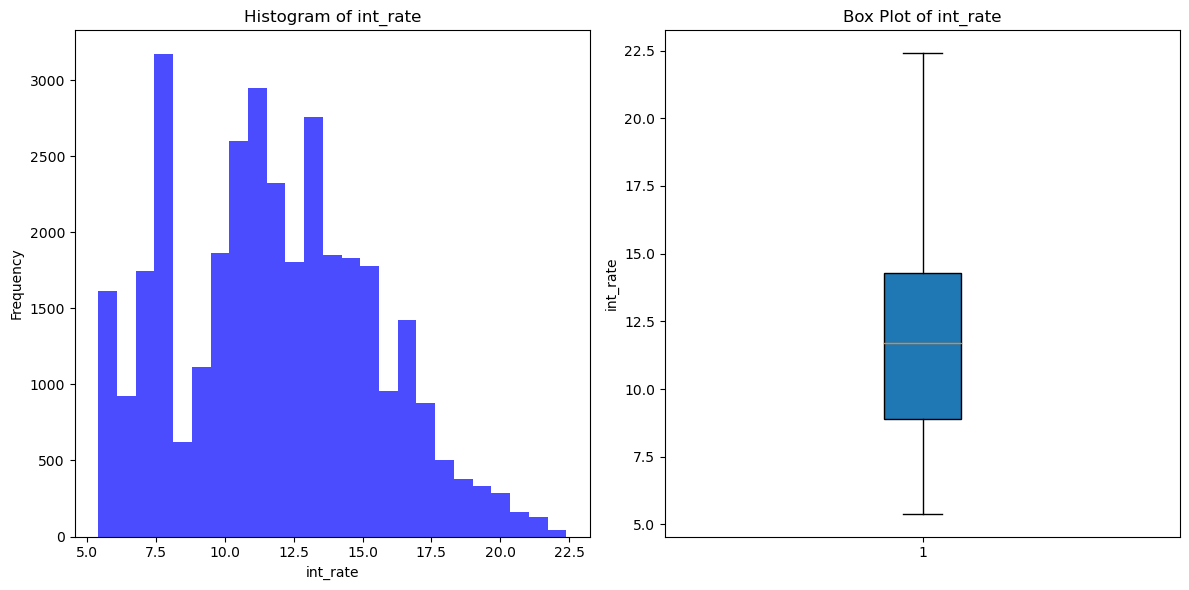

count    34034.000000
mean        11.816818
std          3.588537
min          5.400000
25%          8.900000
50%         11.700000
75%         14.300000
max         22.400000
Name: int_rate, dtype: float64

In [475]:
df_plot_HistBoxGraphs(loan_cleaned_data_1, 'int_rate')
# describe the Loan Amount
loan_cleaned_data_1['int_rate'].describe()

In [476]:
# int_rate Variable observations:
#'int_rate of Most applicants is in between 8.9 to 14.3 as per IQR.
# Average int_rate 11.8

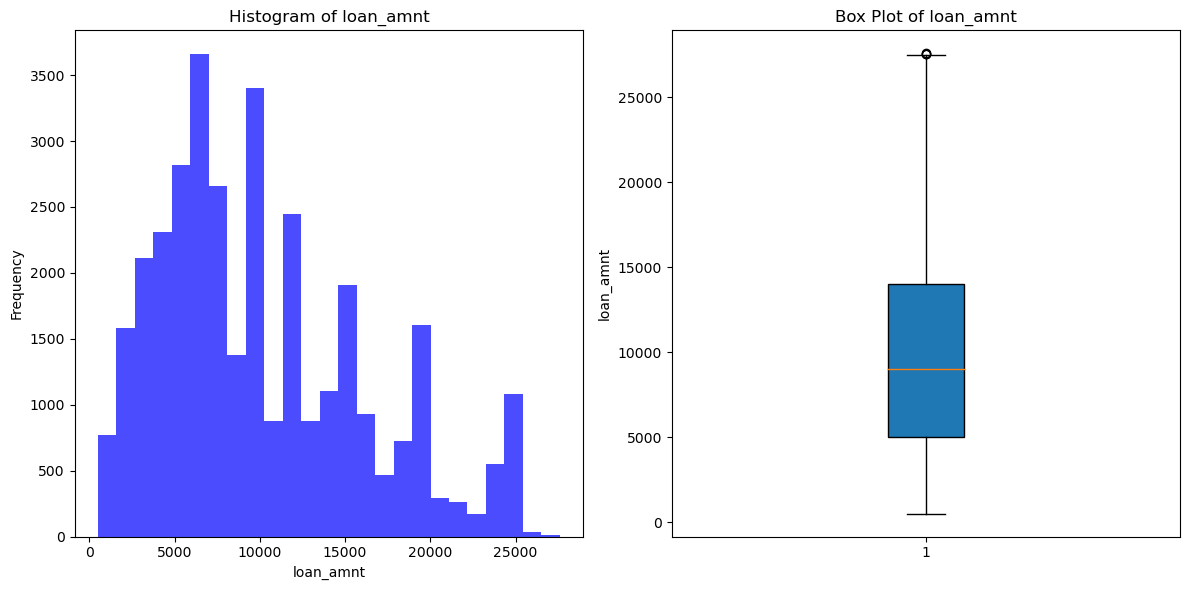

count    34034.000000
mean     10129.445554
std       6109.232241
min        500.000000
25%       5000.000000
50%       9000.000000
75%      14000.000000
max      27600.000000
Name: loan_amnt, dtype: float64

In [477]:
df_plot_HistBoxGraphs(loan_cleaned_data_1, 'loan_amnt')
# describe the Loan Amount
loan_cleaned_data_1['loan_amnt'].describe()

In [478]:
# Loan Amount Variable observations:
# Amount applied by Most applicants for loan is in between 5000-14000 as per IQR.
# Average loan amount is ~10000

### Univariate Analysis - Unordered Categorical VAriables

#Univariate Analysis - Unordered Categorical VAriables

"""
In exploratory data analysis (EDA), visualizing unordered categorical variables helps to understand the distribution and relationships within the data. Here are some common plots used for this purpose:

Bar Plot:

A bar plot displays the frequency or proportion of each category. 
Each category is represented by a bar, with the height corresponding to its count or proportion.
Purpose: Ideal for comparing the size of different categories.


Count Plot:

Similar to a bar plot, a count plot specifically shows the counts of observations in each categorical bin.
Use Case: Often used in conjunction with libraries like Seaborn for quick visualizations.

"""


In [479]:
ordered_categorical_cols = ['emp_length', 'grade', 'sub_grade'] 

unordered_categorical_cols1 = [ 'home_ownership', 'loan_status',  'term', 'verification_status'] 
unordered_categorical_cols2 = ['addr_state', 'purpose'] 


In [480]:
# Count Plots

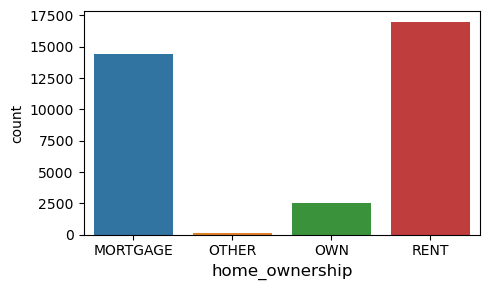

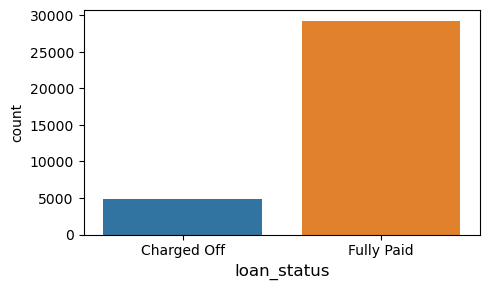

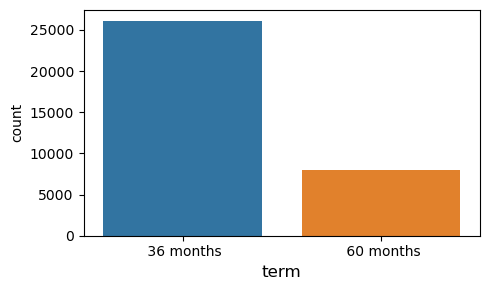

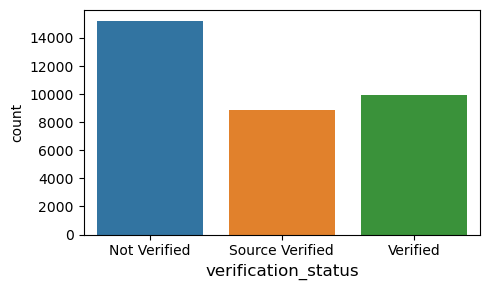

In [481]:
for col in unordered_categorical_cols1:
    plt.figure(figsize=(5,3))
    sns.countplot(x=sorted(loan_cleaned_data_1[col]))
    plt.xlabel(col, fontsize=12, fontweight='normal', color='black')
    plt.tight_layout()
    plt.show()

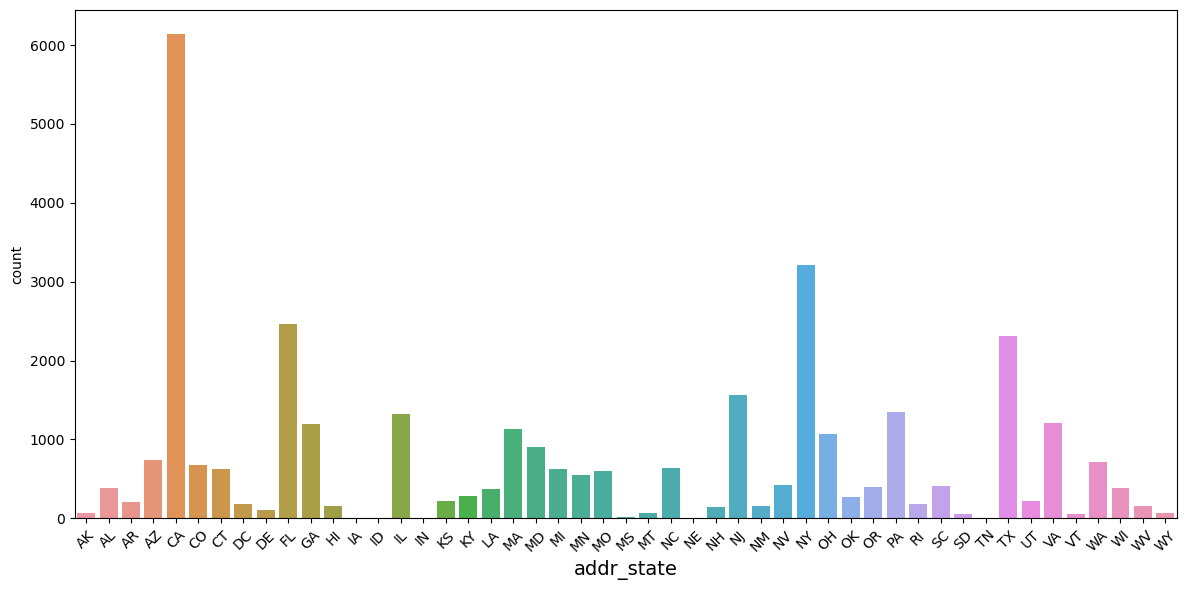

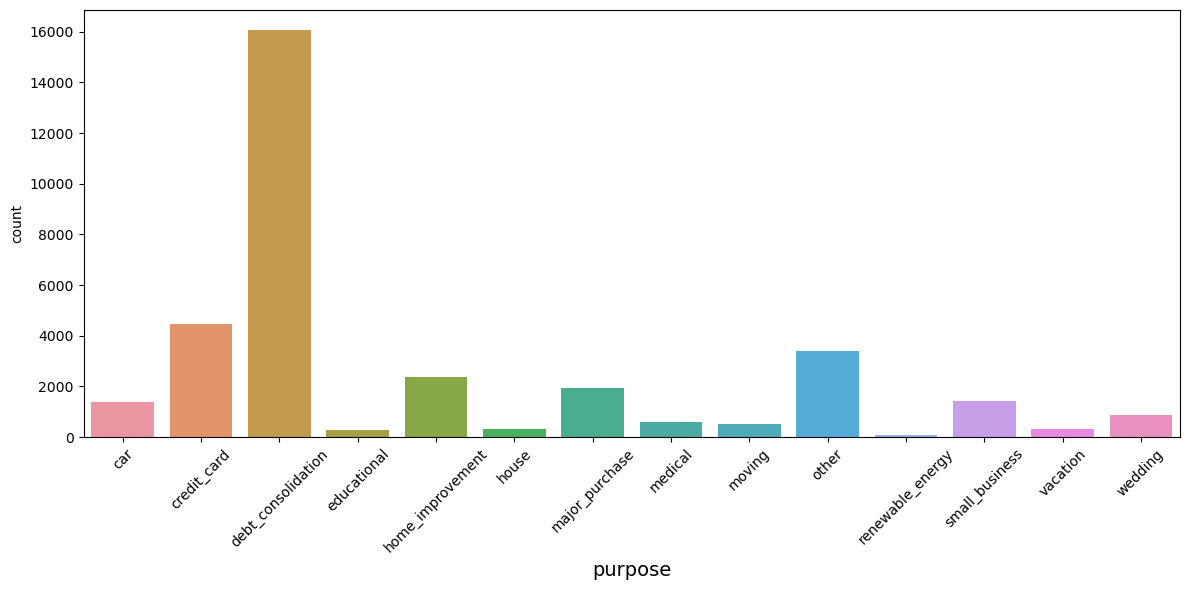

In [482]:
for col in unordered_categorical_cols2:
    plt.figure(figsize=(12,6))
    sns.countplot(x=sorted(loan_cleaned_data_1[col]))
    plt.xlabel(col, fontsize=14, fontweight='normal', color='black')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [483]:
# Bar Plots

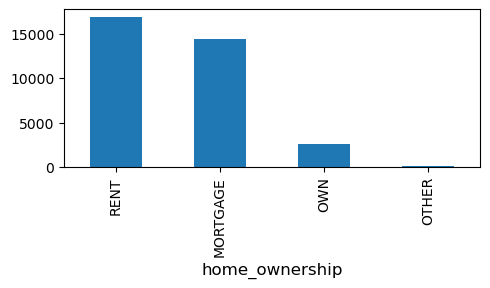

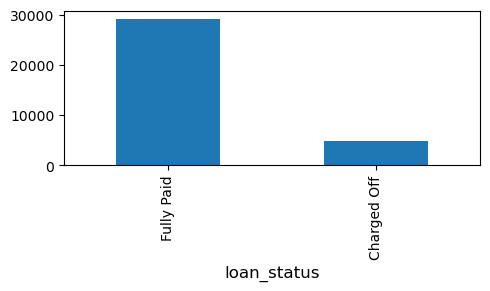

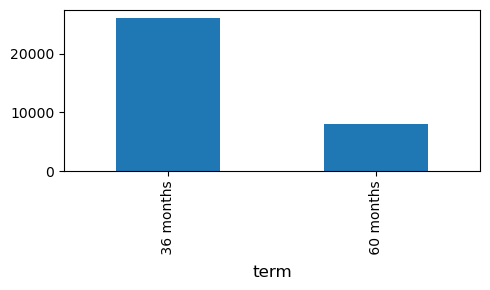

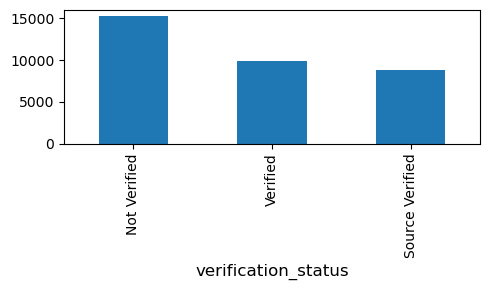

In [484]:
for col in unordered_categorical_cols1:
    plt.figure(figsize=(5,3))
    loan_cleaned_data_1[col].value_counts().plot.bar()
    plt.xlabel(col, fontsize=12, fontweight='normal', color='black')
    plt.tight_layout()
    plt.show()

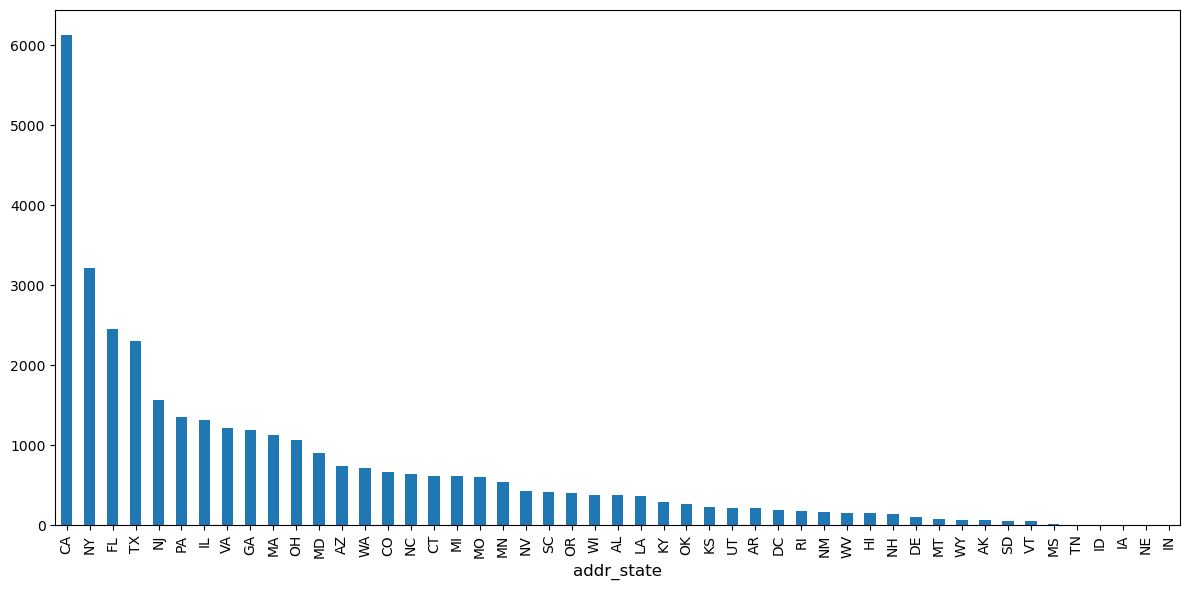

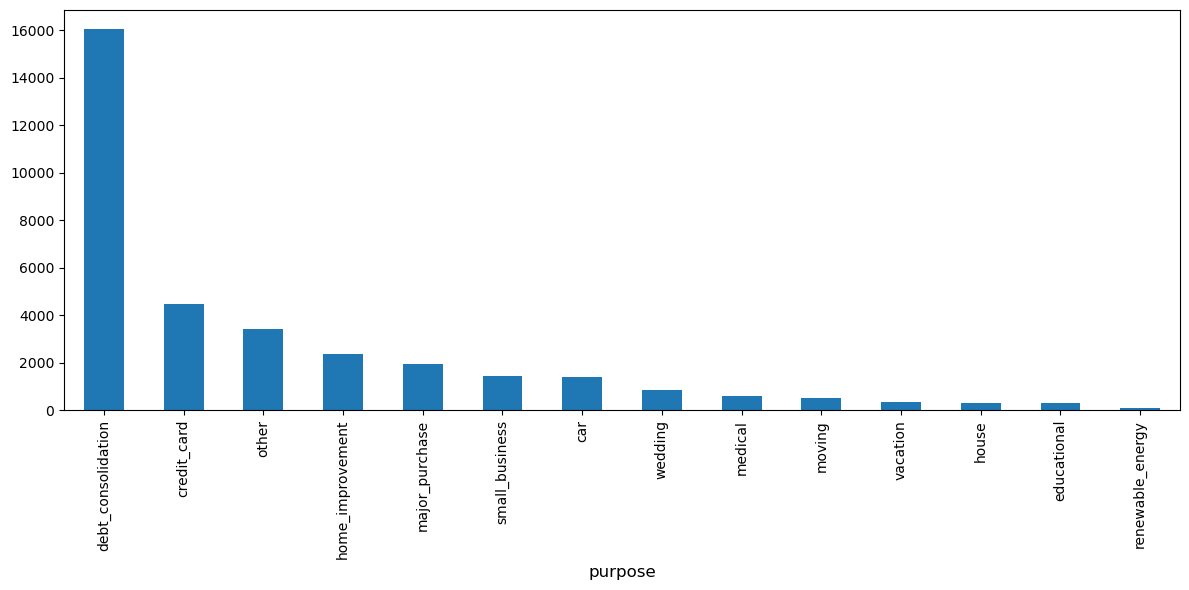

In [485]:
for col in unordered_categorical_cols2:
    plt.figure(figsize=(12,6))
    loan_cleaned_data_1[col].value_counts().plot.bar()
    plt.xlabel(col, fontsize=12, fontweight='normal', color='black')
    plt.tight_layout()
    plt.show()

### Ordered Categorical VAriables

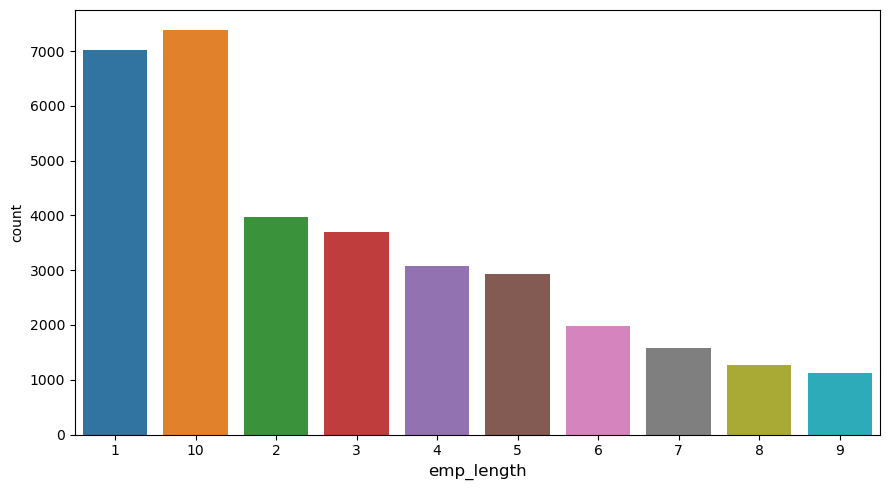

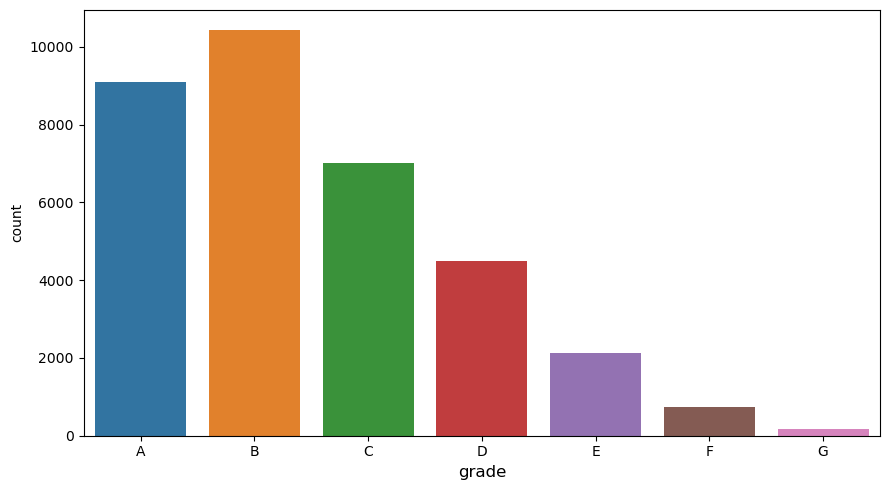

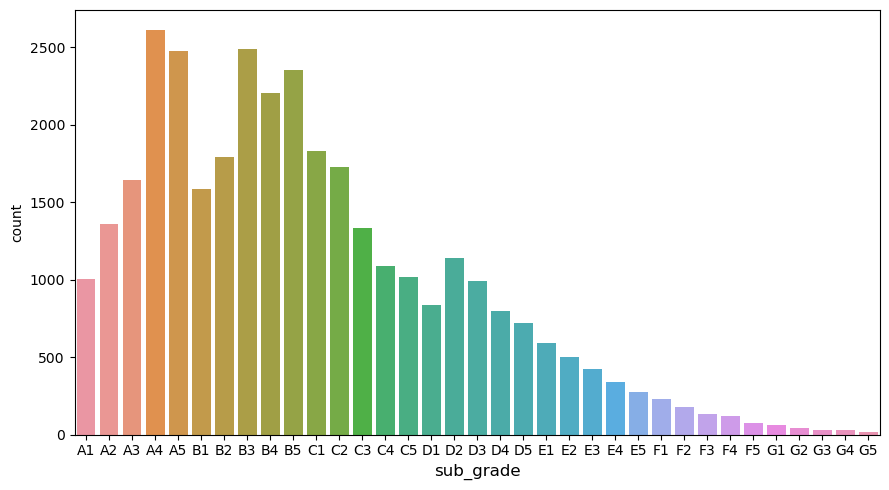

In [486]:
for col in ordered_categorical_cols:
    plt.figure(figsize=(9,5))
    sns.countplot(x=sorted(loan_cleaned_data_1[col]))
    plt.xlabel(col, fontsize=12, fontweight='normal', color='black')
    plt.tight_layout()
    plt.show()

### Bivariate Analysis 

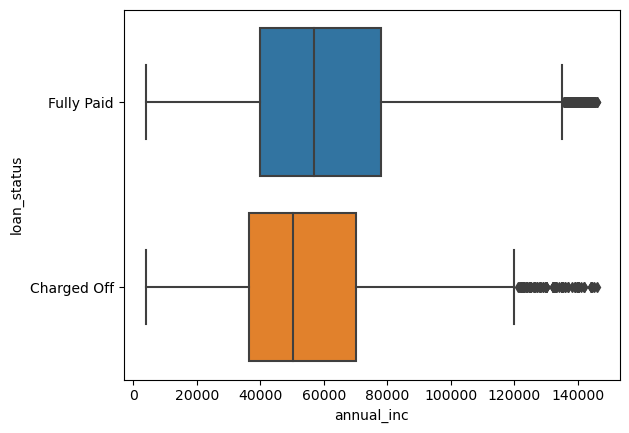

In [487]:
sns.boxplot(x='annual_inc', y='loan_status', data=loan_cleaned_data_1)
plt.show()


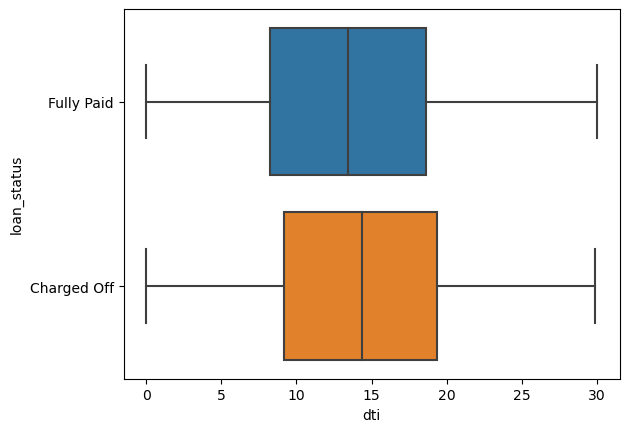

In [488]:
sns.boxplot(x='dti', y='loan_status', data=loan_cleaned_data_1)
plt.show()


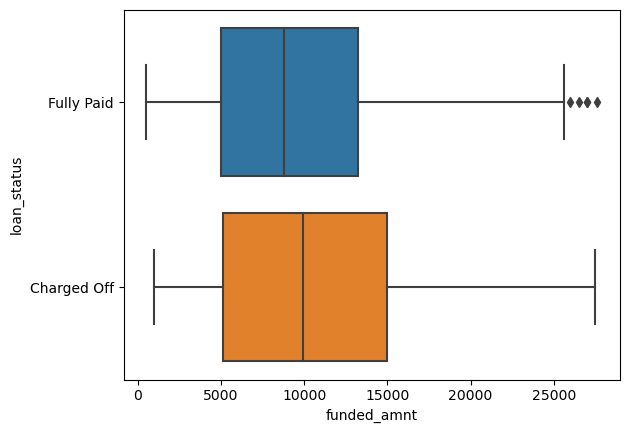

In [489]:
sns.boxplot(x='funded_amnt', y='loan_status', data=loan_cleaned_data_1)
plt.show()


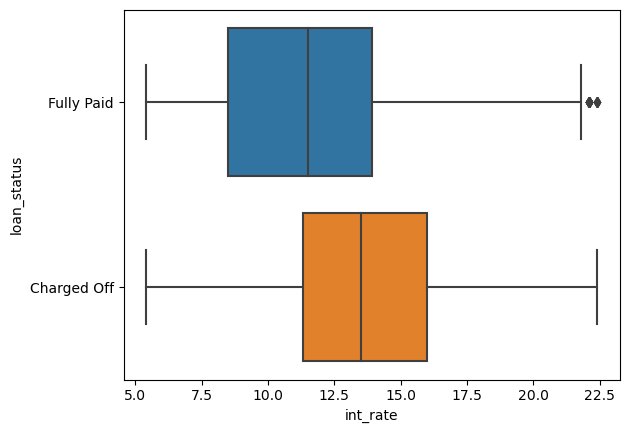

In [490]:
sns.boxplot(x='int_rate', y='loan_status', data=loan_cleaned_data_1)
plt.show()


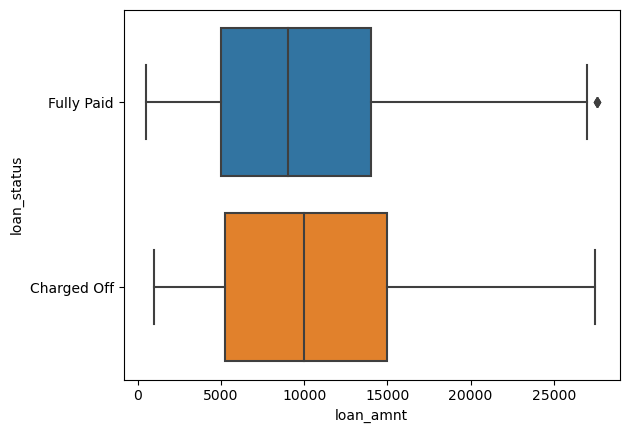

In [491]:
sns.boxplot(x='loan_amnt', y='loan_status', data=loan_cleaned_data_1)
plt.show()


In [492]:
# lets define a function to plot loan_status across categorical variables
def plot_cat(cat_var):
    sns.barplot(x=cat_var, y='loan_status', data=df)
    plt.show()

# Visualising data to check correlation and percentage distribution

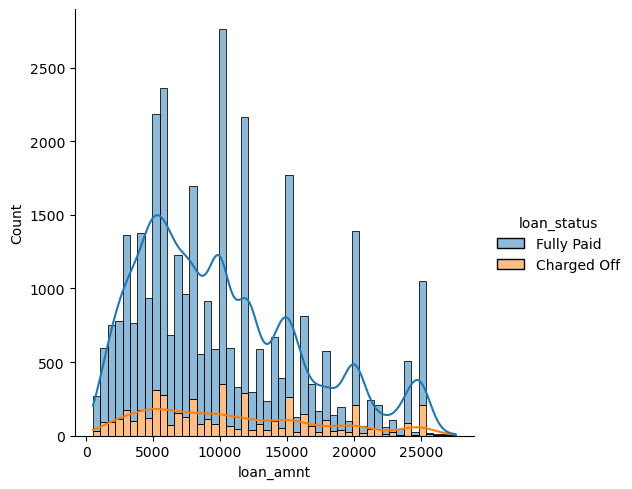

In [493]:
#find correlation between  plot of term and loan amount

sns.displot(data=loan_cleaned_data_1, x="loan_amnt", hue="loan_status", multiple="stack", kde=True)
# does this tell us that people who take loan between 5000 and 10000 are more pront to default


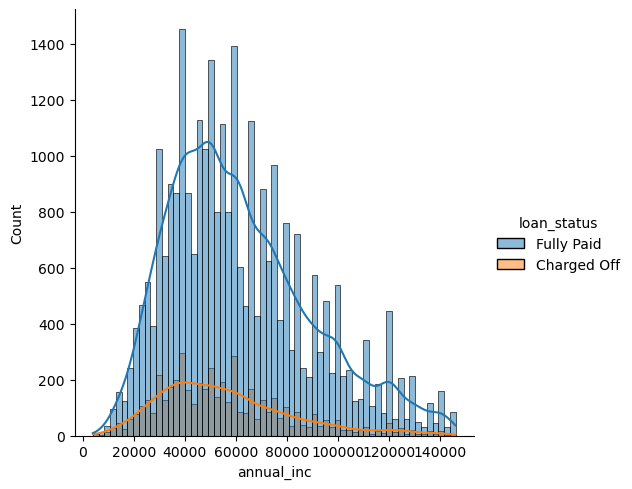

In [494]:
#find correlation between  annual income and loan_status
sns.displot(data=loan_cleaned_data_1, x='annual_inc',hue='loan_status', kde=True)
# does this tell us that people who  have annual come less than 80000 are more   prone to be defaulters ??

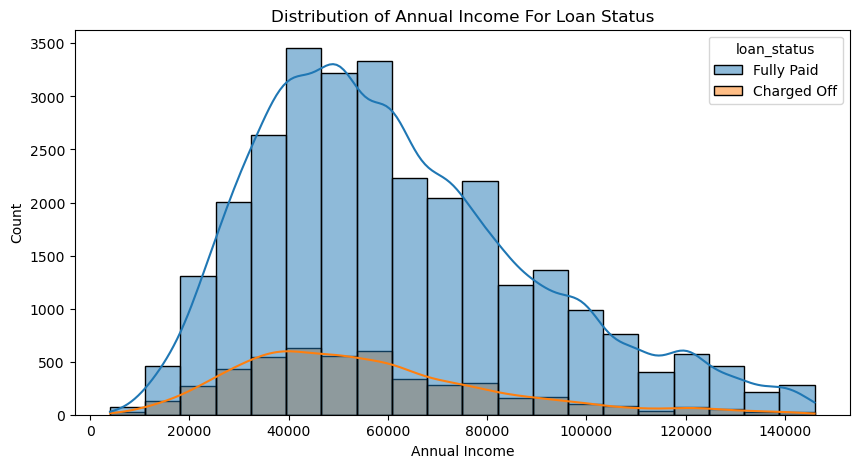

In [495]:
plt.figure(figsize=(10,5))
sns.histplot(data=loan_cleaned_data_1,x='annual_inc',hue='loan_status',bins=20,kde=True)
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.title('Distribution of Annual Income For Loan Status',fontsize=12)
plt.show()

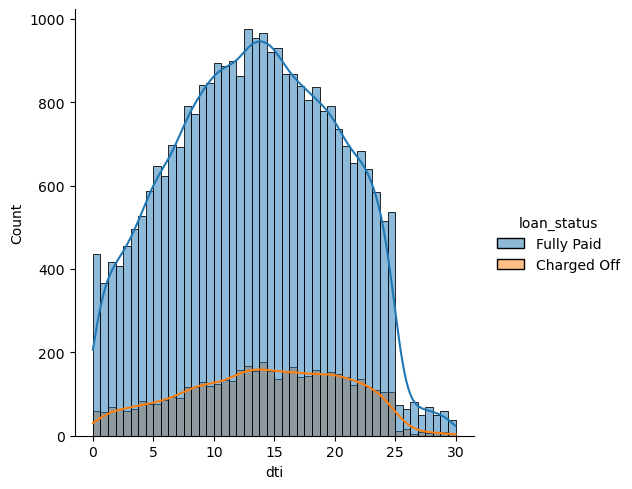

In [496]:
sns.displot(data=loan_cleaned_data_1, x='dti',hue='loan_status', kde=True)
# Inference : customers with dti between 10 and 20 are more likely to default


In [497]:
#sns.countplot(data=loan_cleaned_data_1, x="grade" ,hue="loan_status", stat="percent")
#
#this tells us that grade A and B have been given highest number of loans


grade  loan_status
A      Charged Off     5.953560
       Fully Paid     94.046440
B      Charged Off    12.009592
       Fully Paid     87.990408
C      Charged Off    17.100000
       Fully Paid     82.900000
D      Charged Off    21.713903
       Fully Paid     78.286097
E      Charged Off    26.516220
       Fully Paid     73.483780
F      Charged Off    31.750339
       Fully Paid     68.249661
G      Charged Off    33.333333
       Fully Paid     66.666667
dtype: float64


<Axes: >

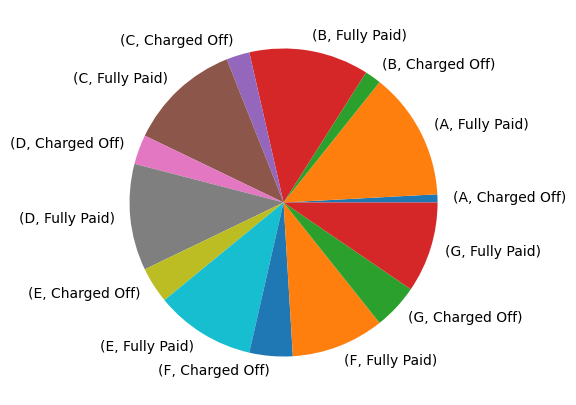

In [498]:
#propotion of loan_status in each grade
propotion_grade = loan_cleaned_data_1.groupby(['grade', 'loan_status']).size()/ loan_cleaned_data_1.groupby(['grade']).size() * 100
print(propotion_grade)
#distribution of the percentage of charged off loans across grades.
#Inference :  A and B grades have lower percent of defaulters

propotion_grade.plot.pie(figsize=(5,5))



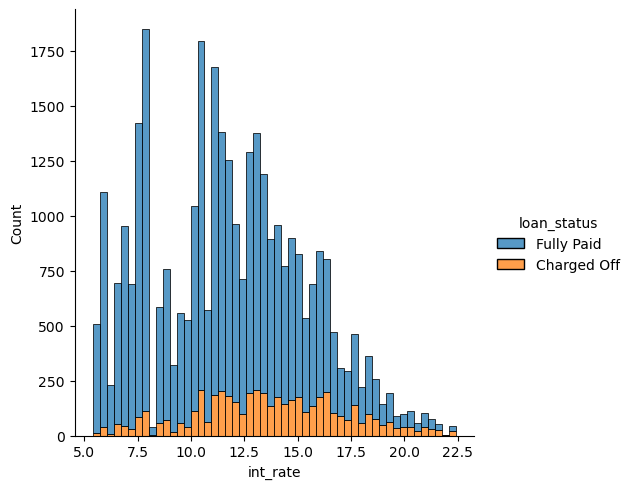

In [499]:
sns.displot(data=loan_cleaned_data_1, x="int_rate" , hue='loan_status', multiple='stack')
#this tell us that interest rate has no correlation with the defaulters

In [500]:
#sns.displot(data=loan_dataset_cleaned, x="home_ownership" , hue='loan_status',  multiple='stack')
propotion = loan_cleaned_data_1.groupby(['home_ownership', 'loan_status']).size()/ loan_cleaned_data_1.groupby(['home_ownership']).size() * 100
propotion
#people with own house have less default rate

home_ownership  loan_status
MORTGAGE        Charged Off    13.283954
                Fully Paid     86.716046
OTHER           Charged Off    18.279570
                Fully Paid     81.720430
OWN             Charged Off    14.296998
                Fully Paid     85.703002
RENT            Charged Off    14.867653
                Fully Paid     85.132347
dtype: float64

In [501]:
def print_highly_correlated(df, features, threshold=0.5):
	#prints highly correlated features pairs in the data frame (helpful for feature engineering)"""
    corr_df = df[features].corr(numeric_only=True) # get correlations
    correlated_features = np.where(np.abs(corr_df) > threshold) # select ones above the abs threshold
    correlated_features = [(corr_df.iloc[x,y], x, y) for x, y in zip(*correlated_features) if x != y and x < y] # avoid duplication
    s_corr_list = sorted(correlated_features, key=lambda x: -abs(x[0])) # sort by correlation value

    if s_corr_list == []:
      print("There are no highly correlated features with correlation above", threshold)
    else:
      for v, i, j in s_corr_list:
        cols = df[features].columns
        print ("%s and %s = %.3f" % (corr_df.index[i], corr_df.columns[j], v))

In [502]:
print_highly_correlated(loan_cleaned_data_1, loan_cleaned_data_1.columns, 0.5)

loan_amnt and funded_amnt = 0.980
funded_amnt and funded_amnt_inv = 0.966
loan_amnt and funded_amnt_inv = 0.945


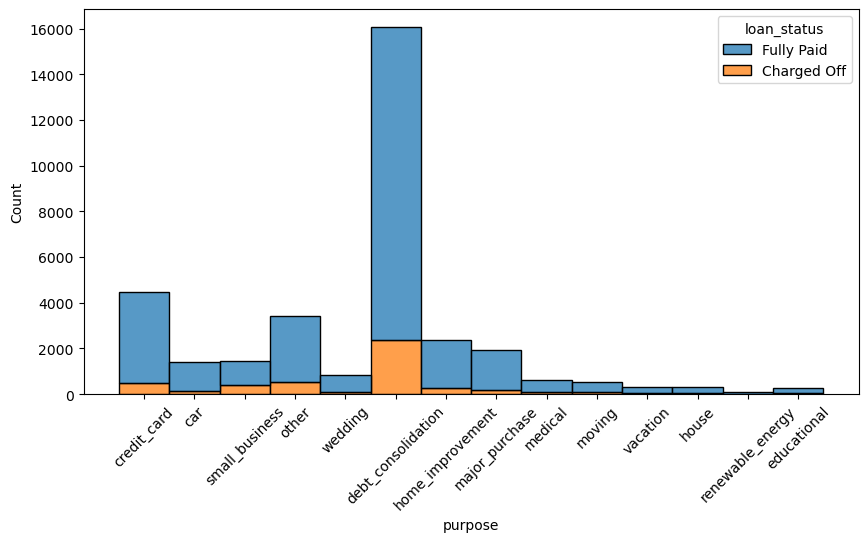

In [503]:
plt.figure(figsize=(10,5))
ax  =  sns.histplot(data=loan_cleaned_data_1, x="purpose" , hue='loan_status',  multiple='stack')
ax.tick_params(axis='x', labelrotation=45)
plt.show()
#debt consolidation seems to be the maximum purpose for taking loan and has more defaulters

<Axes: xlabel='emp_length', ylabel='Count'>

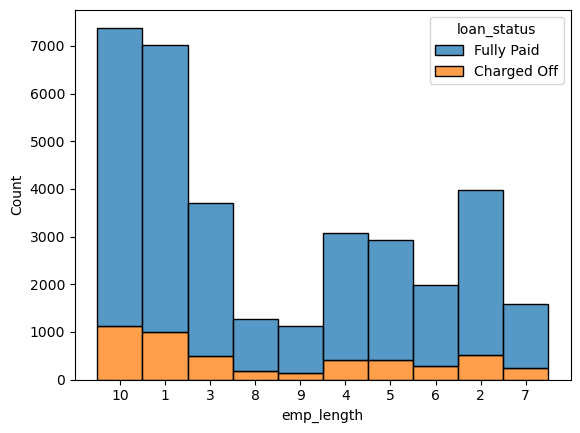

In [504]:
sns.histplot(data=loan_cleaned_data_1, x="emp_length" , hue='loan_status',  multiple='stack')
#Inference . Customers with 1 year and 10+  years of experince take loan more loans

In [505]:
propotion = loan_cleaned_data_1.groupby(['emp_length', 'loan_status']).size()/ loan_cleaned_data_1.groupby(['emp_length']).size() * 100
propotion
#inference . customers at all employment length have an average of 14% defaulters

emp_length  loan_status
1           Charged Off    14.161685
            Fully Paid     85.838315
10          Charged Off    15.359610
            Fully Paid     84.640390
2           Charged Off    13.086233
            Fully Paid     86.913767
3           Charged Off    13.640054
            Fully Paid     86.359946
4           Charged Off    13.391699
            Fully Paid     86.608301
5           Charged Off    14.212504
            Fully Paid     85.787496
6           Charged Off    14.055416
            Fully Paid     85.944584
7           Charged Off    14.793651
            Fully Paid     85.206349
8           Charged Off    14.240755
            Fully Paid     85.759245
9           Charged Off    13.012478
            Fully Paid     86.987522
dtype: float64

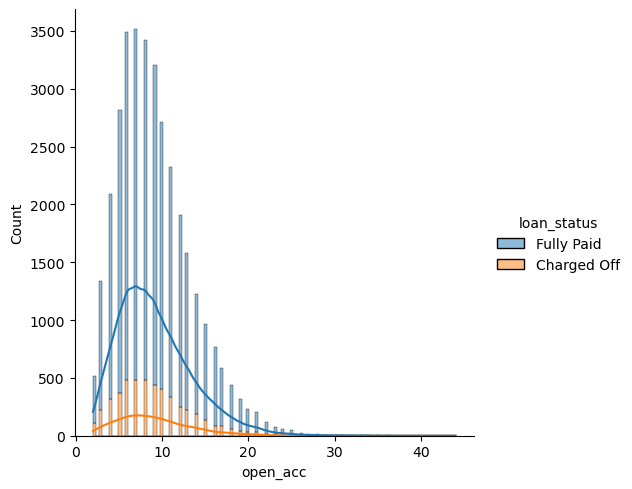

In [506]:
sns.displot(data=loan_cleaned_data_1, x="open_acc" , hue='loan_status',  multiple='stack', kde=True)
# customers with open accounts between 5 and 10 have more defaulters

In [507]:
#find propotion of open accounts to loan status as charged off
open_acc_20 = loan_cleaned_data_1[loan_cleaned_data_1.open_acc > 20]
propotion = open_acc_20.groupby(['open_acc', 'loan_status']).size()/ open_acc_20.groupby(['open_acc']).size() * 100
propotion

open_acc  loan_status
21        Charged Off     14.925373
          Fully Paid      85.074627
22        Charged Off     12.820513
          Fully Paid      87.179487
23        Charged Off     14.473684
          Fully Paid      85.526316
24        Charged Off     11.111111
          Fully Paid      88.888889
25        Charged Off     20.833333
          Fully Paid      79.166667
26        Charged Off     20.000000
          Fully Paid      80.000000
27        Charged Off     11.111111
          Fully Paid      88.888889
28        Charged Off     21.052632
          Fully Paid      78.947368
29        Fully Paid     100.000000
30        Charged Off     20.000000
          Fully Paid      80.000000
31        Charged Off     50.000000
          Fully Paid      50.000000
32        Fully Paid     100.000000
33        Charged Off     66.666667
          Fully Paid      33.333333
34        Charged Off     20.000000
          Fully Paid      80.000000
35        Fully Paid     100.000000
36    

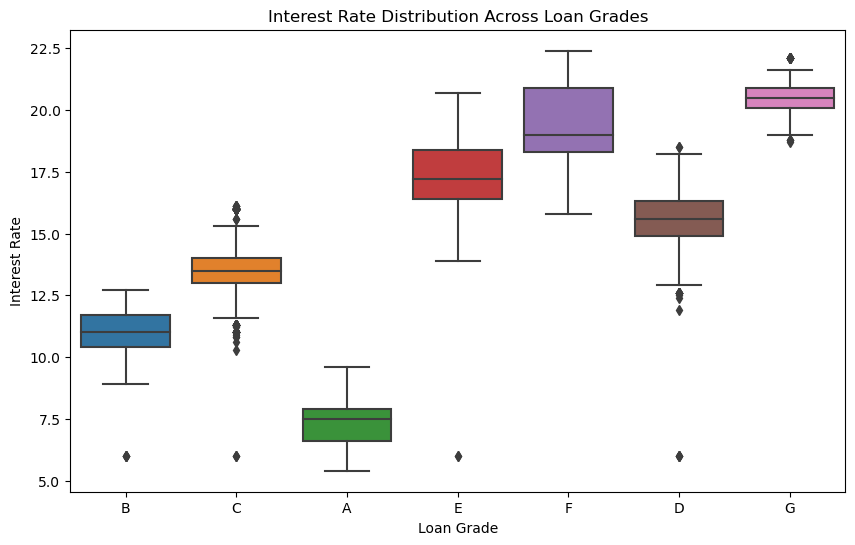

In [508]:
# prompt: bi variate analysis using grade and int_rate

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.boxplot(x='grade', y='int_rate', data=loan_cleaned_data_1)
plt.title('Interest Rate Distribution Across Loan Grades')
plt.xlabel('Loan Grade')
plt.ylabel('Interest Rate')
plt.show()

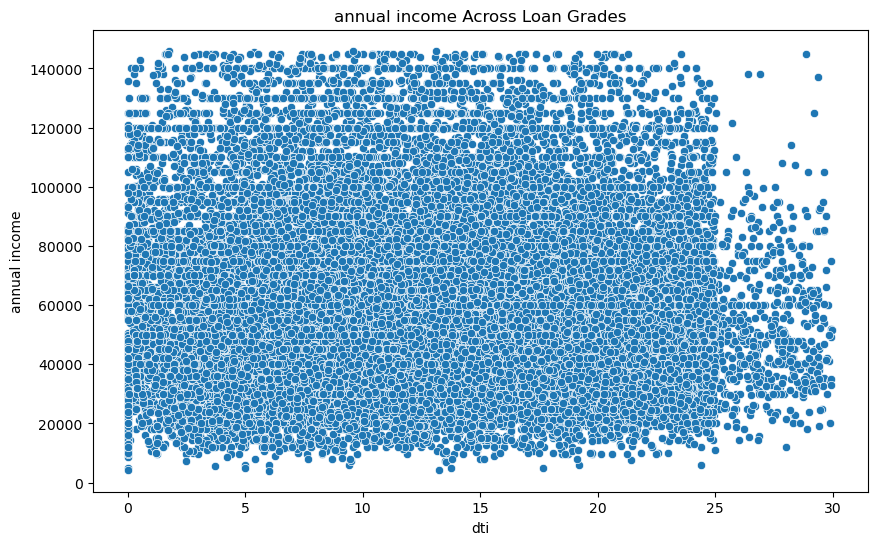

In [509]:
# prompt: bi variate analysis using dti and annual income

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.scatterplot(x='dti', y='annual_inc', data=loan_cleaned_data_1)
plt.title('annual income Across Loan Grades')
plt.xlabel('dti')
plt.ylabel('annual income')
plt.show()

               purpose  loan_status  count  total
0                  car  Charged Off    150   1388
1                  car   Fully Paid   1238   1388
2          credit_card  Charged Off    464   4455
3          credit_card   Fully Paid   3991   4455
4   debt_consolidation  Charged Off   2377  16054
5   debt_consolidation   Fully Paid  13677  16054
6          educational  Charged Off     48    288
7          educational   Fully Paid    240    288
8     home_improvement  Charged Off    283   2361
9     home_improvement   Fully Paid   2078   2361
10               house  Charged Off     49    304
11               house   Fully Paid    255    304
12      major_purchase  Charged Off    200   1943
13      major_purchase   Fully Paid   1743   1943
14             medical  Charged Off     95    608
15             medical   Fully Paid    513    608
16              moving  Charged Off     79    517
17              moving   Fully Paid    438    517
18               other  Charged Off    539   3403


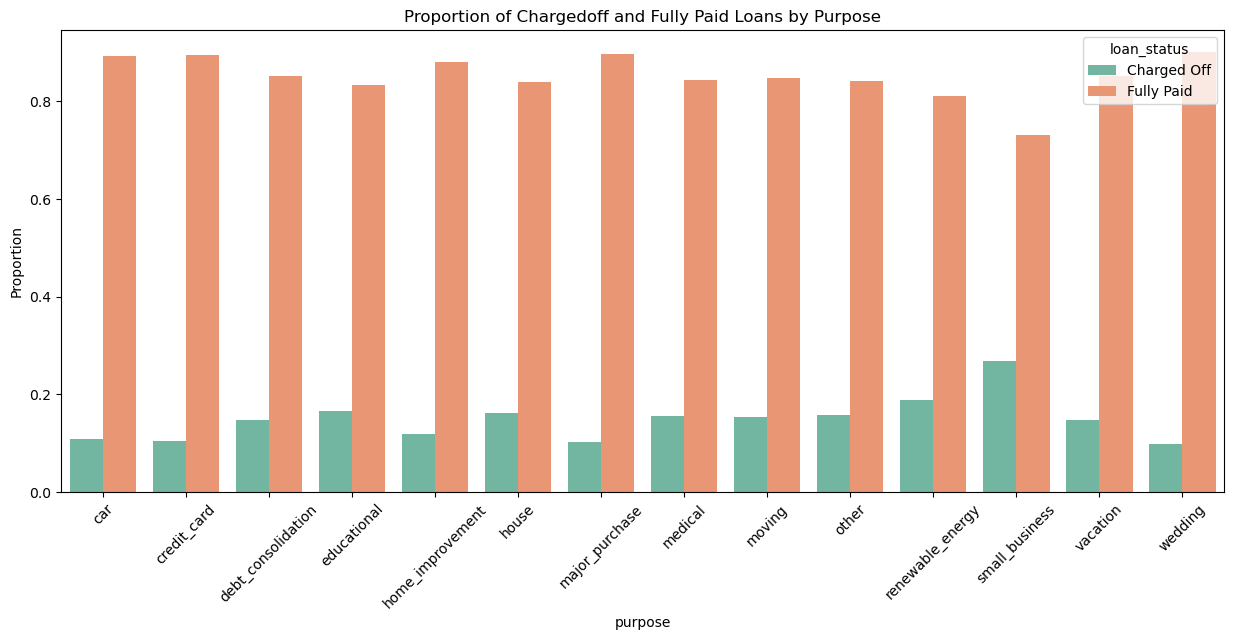

In [510]:
# Step 1: Group by LoanPurpose, and loan_status to count occurrences
grouped = loan_cleaned_data_1.groupby([ 'purpose', 'loan_status']).size().reset_index(name='count')

# Step 2: Calculate the total loans for Purpose
grouped['total'] = grouped.groupby([ 'purpose'])['count'].transform('sum')


print(grouped)

# Step 3: Calculate the proportion of each loan_status within each group
grouped['proportion'] = grouped['count'] / grouped['total']

# Step 4: Plot the graph
plt.figure(figsize=(15, 6))
sns.barplot(data=grouped, x='purpose', y='proportion', hue='loan_status', palette='Set2', dodge=True)
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.title('Proportion of Chargedoff and Fully Paid Loans by Purpose')
plt.show()



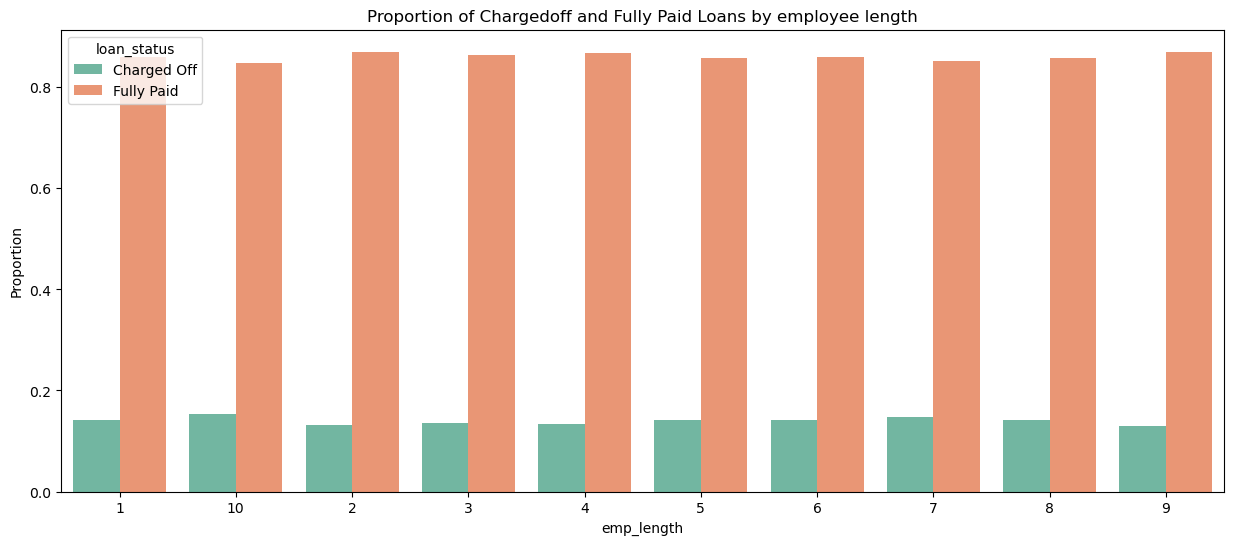

In [511]:
# Step 1: Group by LoanPurpose, and loan_status to count occurrences
grouped = loan_cleaned_data_1.groupby([ 'emp_length', 'loan_status']).size().reset_index(name='count')

# Step 2: Calculate the total loans for each Term and LoanPurpose
grouped['total'] = grouped.groupby([ 'emp_length'])['count'].transform('sum')

# Step 3: Calculate the proportion of each loan_status within each group
grouped['proportion'] = grouped['count'] / grouped['total']

# Step 4: Plot the graph
plt.figure(figsize=(15, 6))
sns.barplot(data=grouped, x='emp_length', y='proportion', hue='loan_status', palette='Set2', dodge=True)
plt.ylabel('Proportion')
plt.title('Proportion of Chargedoff and Fully Paid Loans by employee length')
plt.show()


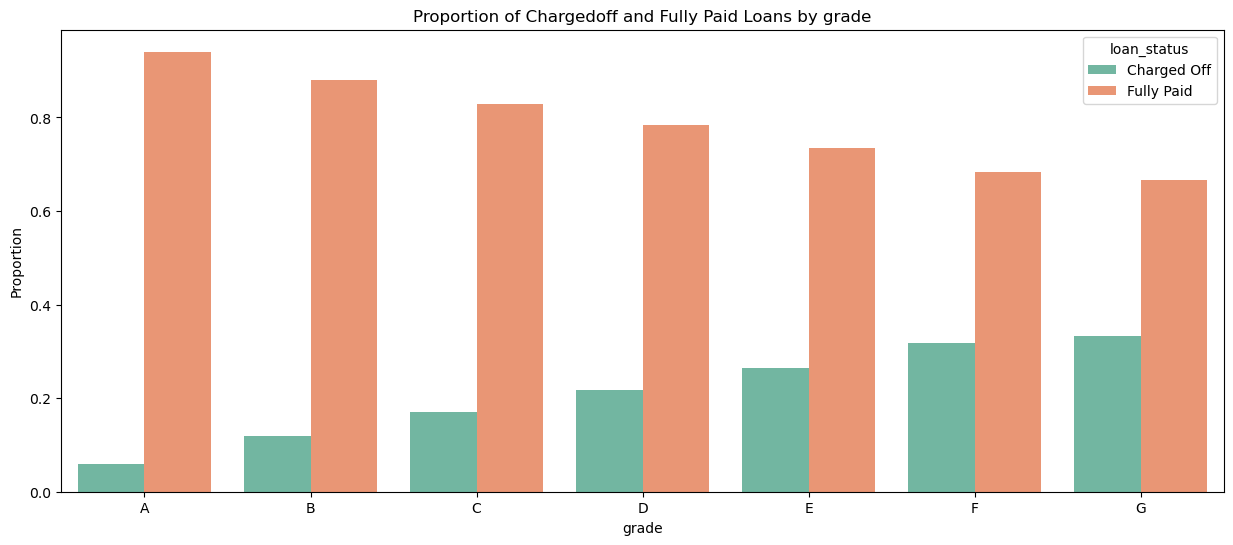

In [512]:
# Step 1: Group by LoanPurpose, and loan_status to count occurrences
grouped = loan_cleaned_data_1.groupby([ 'grade', 'loan_status']).size().reset_index(name='count')

# Step 2: Calculate the total loans for each Term and LoanPurpose
grouped['total'] = grouped.groupby([ 'grade'])['count'].transform('sum')

# Step 3: Calculate the proportion of each loan_status within each group
grouped['proportion'] = grouped['count'] / grouped['total']

# Step 4: Plot the graph
plt.figure(figsize=(15, 6))
sns.barplot(data=grouped, x='grade', y='proportion', hue='loan_status', palette='Set2', dodge=True)
plt.ylabel('Proportion')
plt.title('Proportion of Chargedoff and Fully Paid Loans by grade')
plt.show()


0     False
1     False
2     False
3     False
4     False
      ...  
89    False
90    False
91    False
92    False
93    False
Name: proportion, Length: 94, dtype: bool


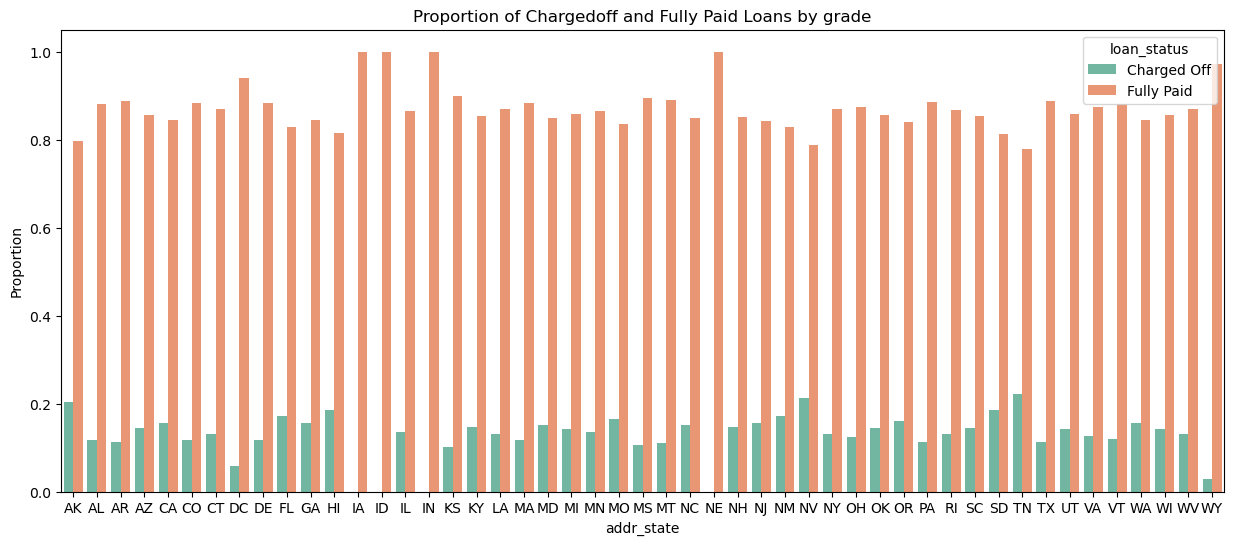

In [518]:
# Step 1: Group by LoanPurpose, and loan_status to count occurrences
grouped = loan_cleaned_data_1.groupby([ 'addr_state', 'loan_status']).size().reset_index(name='count')

# Step 2: Calculate the total loans for each Term and LoanPurpose
grouped['total'] = grouped.groupby([ 'addr_state'])['count'].transform('sum')

# Step 3: Calculate the proportion of each loan_status within each group
grouped['proportion'] = grouped['count'] / grouped['total']

# Step 4: Plot the graph
plt.figure(figsize=(15, 6))
sns.barplot(data=grouped, x='addr_state', y='proportion', hue='loan_status', palette='Set2', dodge=True)
plt.ylabel('Proportion')
plt.title('Proportion of Chargedoff and Fully Paid Loans by grade')
plt.show()
